# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data

df= pd.read_csv('temperature_data.csv')
df

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


# EDA

In [3]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [5]:
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
998065    False
998066    False
998067    False
998068    False
998069    False
Length: 998070, dtype: bool

In [7]:
df['profile_id'].nunique()

52

In [8]:
df['profile_id'].value_counts()

profile_id
20    43970
6     40387
65    40093
66    36475
27    35360
4     33423
58    33381
56    33122
53    32441
79    31153
44    26340
70    25676
62    25599
30    23862
80    23823
74    23760
68    23330
36    22608
76    22187
48    21982
29    21357
32    20959
81    17671
45    17141
42    16919
73    16785
41    16699
63    16667
31    15586
69    15349
72    15300
10    15255
71    14655
77    14621
60    14542
61    14515
57    14402
75    13471
67    11134
49    10815
50    10809
54    10806
55    10806
78     8444
43     8442
11     7886
59     7474
51     6260
64     6249
52     3725
46     2179
47     2175
Name: count, dtype: int64

In [9]:
df['profile_id'].unique()

array([ 4,  6, 10, 11, 20, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       72], dtype=int64)

In [10]:
df.mean()

ambient           -0.003905
coolant            0.004723
u_d                0.004780
u_q               -0.005690
motor_speed       -0.006336
torque            -0.003333
i_d                0.006043
i_q               -0.003194
pm                -0.004396
stator_yoke        0.000609
stator_tooth      -0.002208
stator_winding    -0.003935
profile_id        50.732001
dtype: float64

In [11]:
df.std()

ambient            0.993127
coolant            1.002423
u_d                0.997878
u_q                1.002330
motor_speed        1.001229
torque             0.997907
i_d                0.998994
i_q                0.997912
pm                 0.995686
stator_yoke        1.001049
stator_tooth       0.999597
stator_winding     0.998343
profile_id        22.073125
dtype: float64

C:\Users\om\AppData\Local\Temp\ipykernel_4792\4142343840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='profile_id', data=df, palette='viridis')


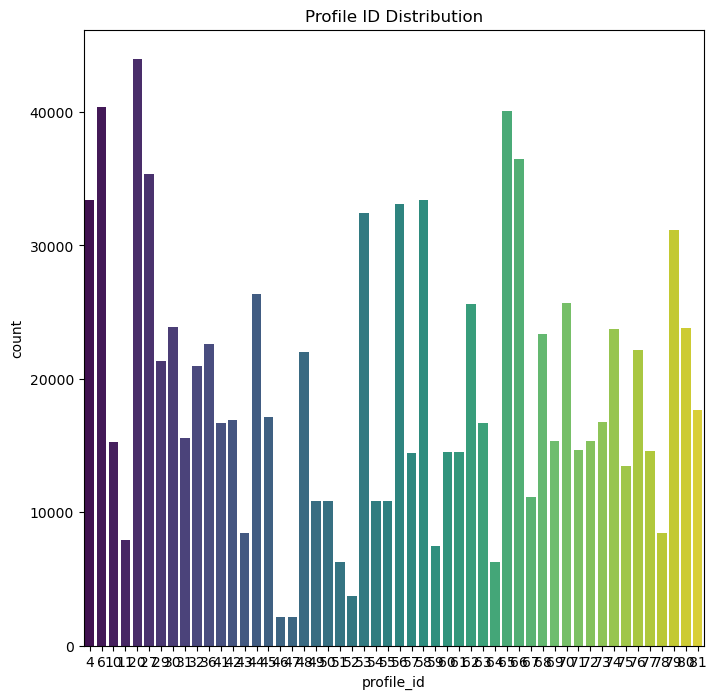

In [12]:
# Visualize the distribution of profile_id
plt.figure(figsize=(8, 8))
sns.countplot(x='profile_id', data=df, palette='viridis')
plt.title("Profile ID Distribution")
plt.show()

<Figure size 3000x2500 with 0 Axes>

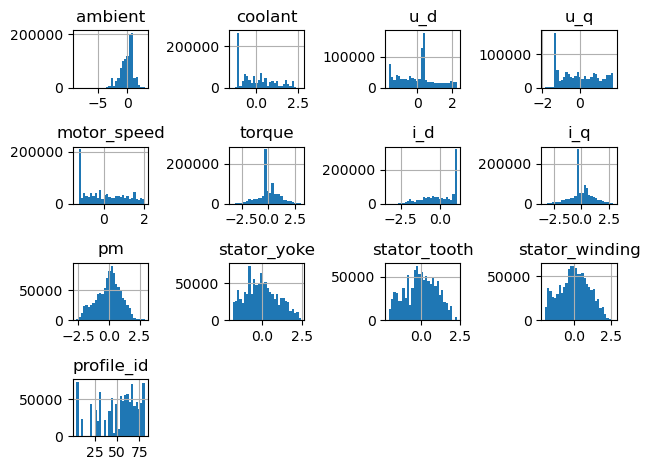

In [13]:
plt.figure(figsize=(30,25))
plt.subplots_adjust(hspace =0.5,wspace = 0.50)
df.hist(layout=(4,4),bins=30)
plt.tight_layout()

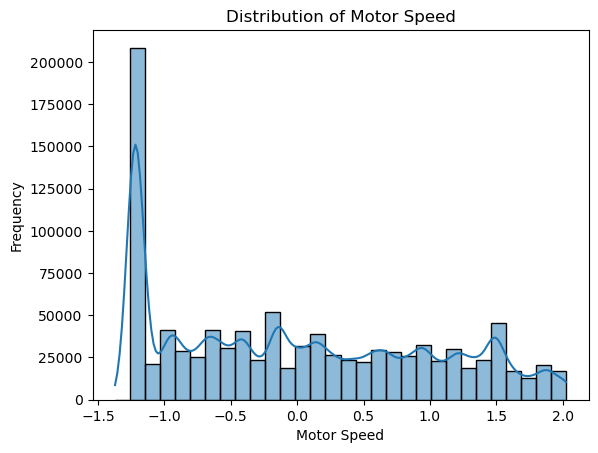

In [14]:
sns.histplot(df['motor_speed'],kde=True,bins=30)
plt.title('Distribution of Motor Speed')
plt.xlabel('Motor Speed')
plt.ylabel('Frequency')
plt.show()

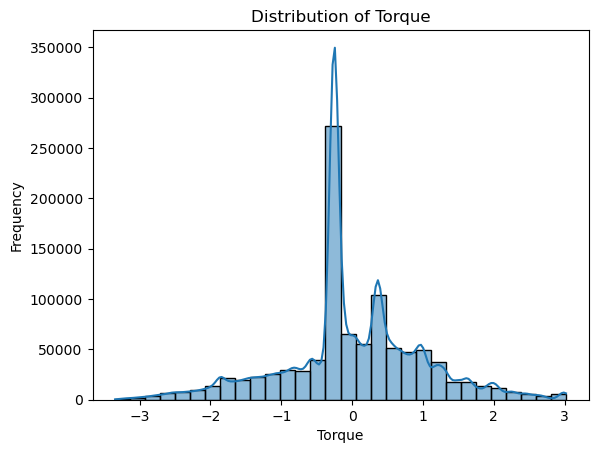

In [15]:
sns.histplot(df['torque'],kde=True,bins=30)
plt.title('Distribution of Torque')
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.show()

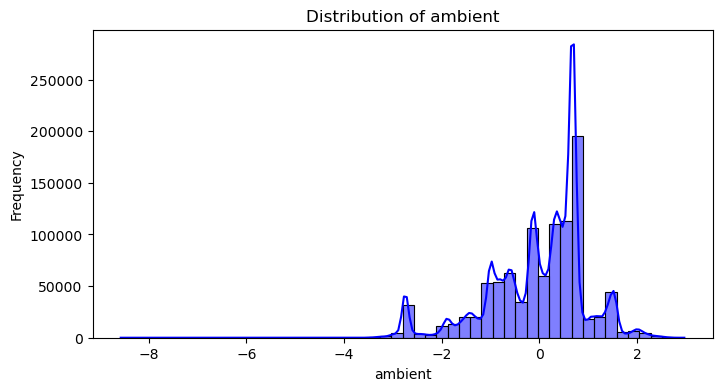

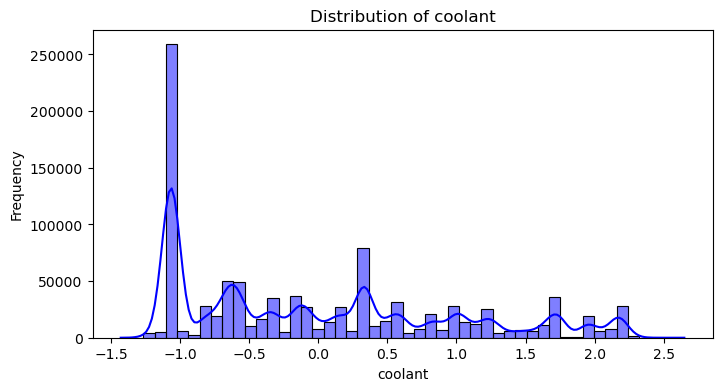

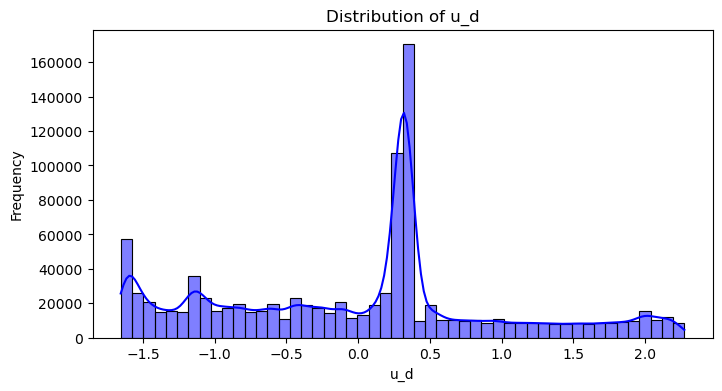

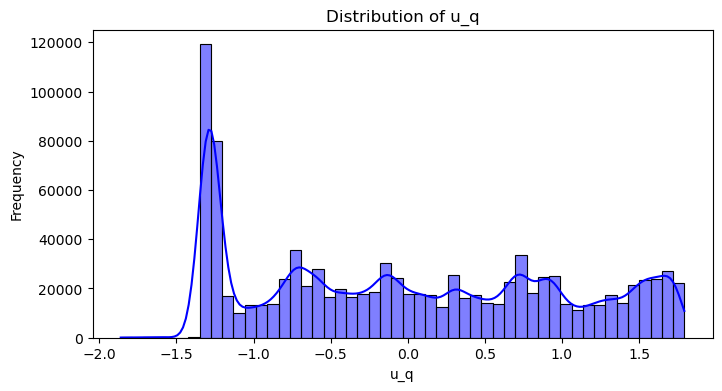

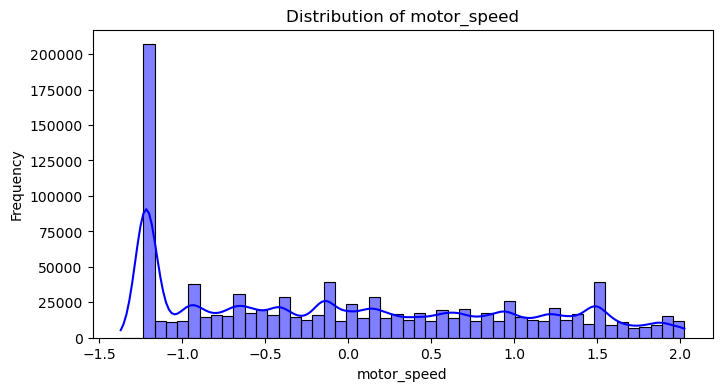

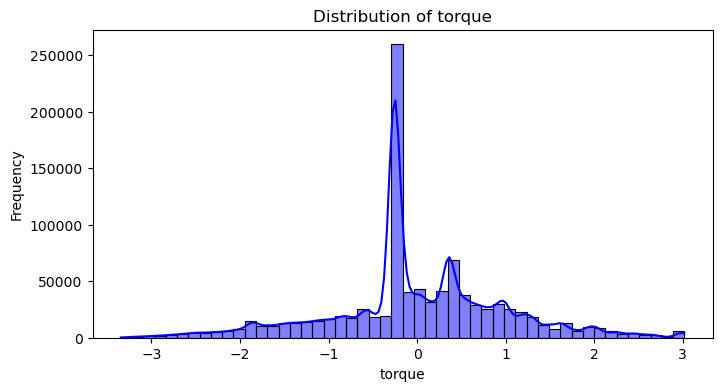

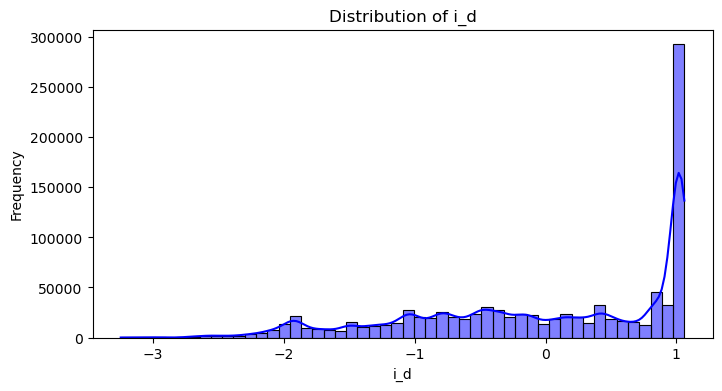

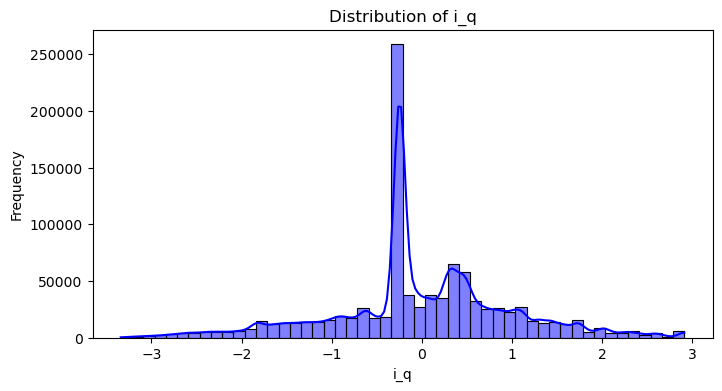

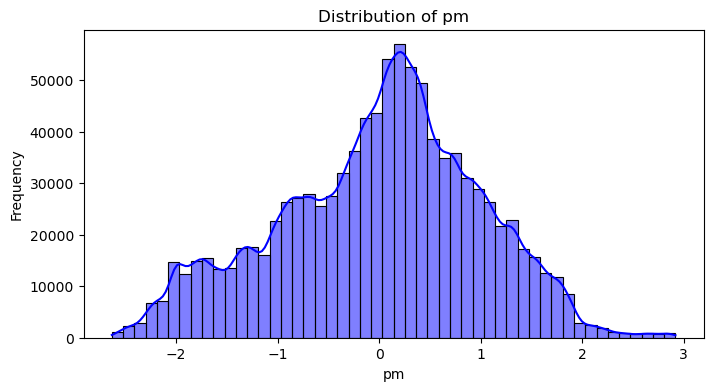

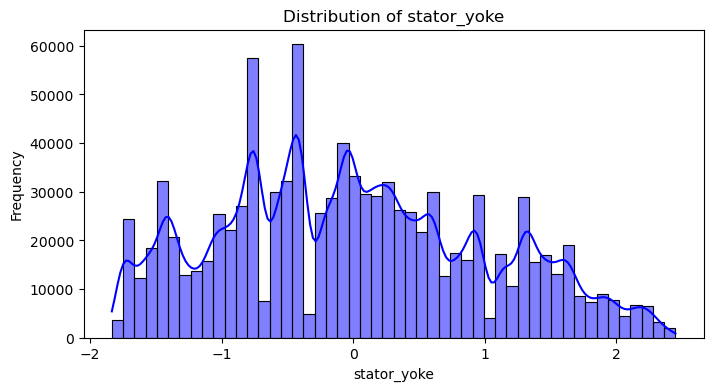

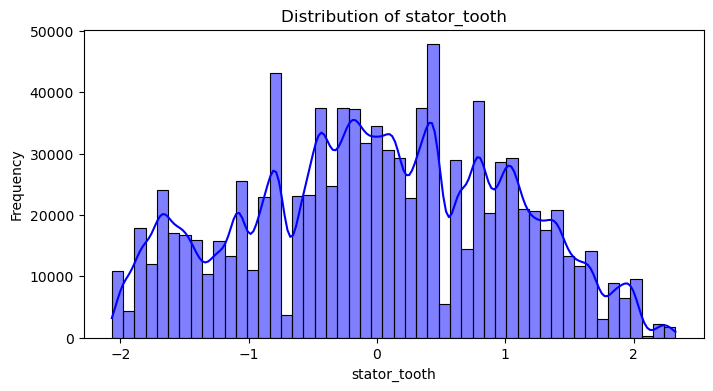

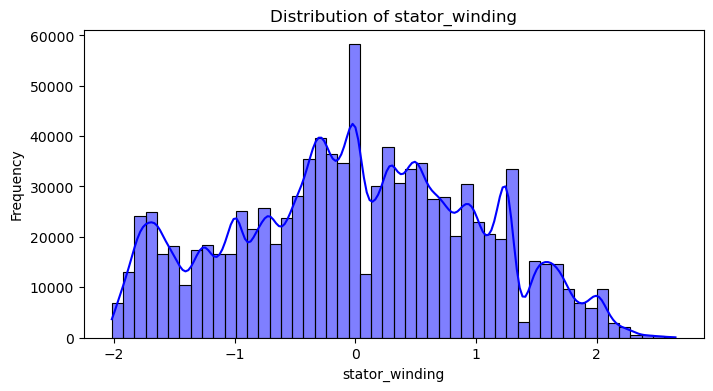

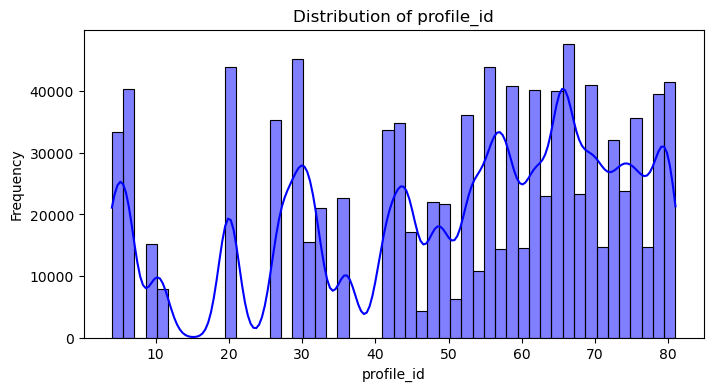

In [17]:
for feature in df:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=50, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

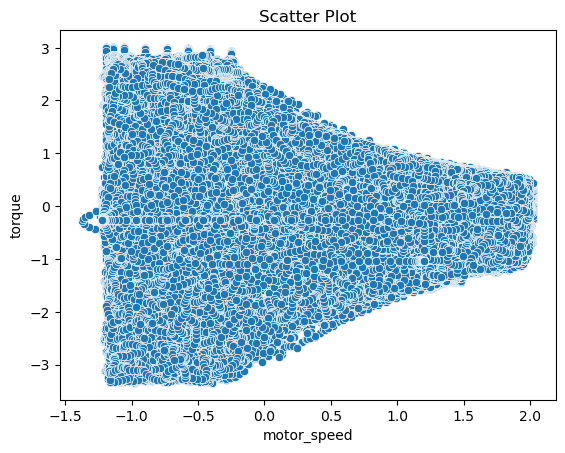

In [18]:
# Scatter plot
sns.scatterplot(x='motor_speed', y='torque', data=df)
plt.title('Scatter Plot')
plt.show()

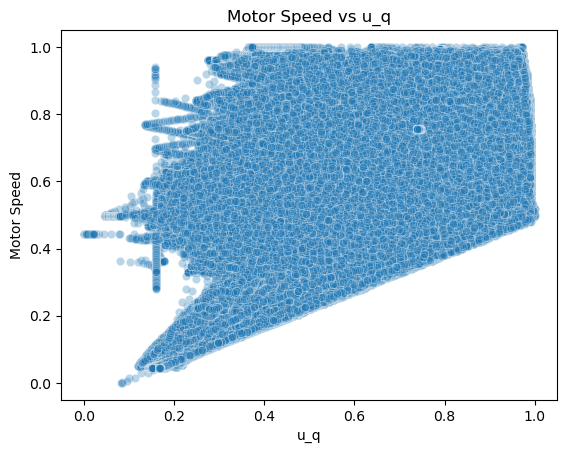

In [62]:
sns.scatterplot(x=df['u_q'], y=df['motor_speed'], alpha=0.3)
plt.title("Motor Speed vs u_q")
plt.xlabel("u_q")
plt.ylabel("Motor Speed")
plt.show()

In [63]:
# Exclude 'profile_id' (categorical feature)

numerical_cols = df.columns[:-1]  # Assuming 'profile_id' is the last column

In [64]:
# Standardize numerical features

sc = StandardScaler()
df[numerical_cols] = sc.fit_transform(df[numerical_cols])

In [65]:
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id,profile_id_label,torque_motor_speed,i_d_i_q,torque_squared,motor_speed_cubed,outlier
0,-0.783789,-1.120454,0.325709,-1.289164,-1.214600,-0.314976,1.024560,-0.324420,-2.529653,-1.830112,-2.064767,-2.017442,-2.117146,-1.544227,-1.141378,0.646408,-0.379921,-0.752964,1
1,-0.803565,-1.119032,0.327446,-1.288994,-1.214601,-0.313747,1.024497,-0.324386,-2.530001,-1.829659,-2.063483,-2.017040,-2.117146,-1.544227,-1.141336,0.646388,-0.378803,-0.752964,1
2,-0.815593,-1.118693,0.330567,-1.293119,-1.214600,-0.314096,1.024435,-0.324369,-2.530258,-1.829091,-2.062697,-2.016752,-2.117146,-1.544227,-1.141347,0.646356,-0.379120,-0.752964,1
3,-0.813569,-1.118776,0.331500,-1.293150,-1.214602,-0.313164,1.027836,-0.325747,-2.529219,-1.829024,-2.061760,-2.017041,-2.117146,-1.544227,-1.141316,0.647771,-0.378273,-0.752964,1
4,-0.806440,-1.118787,0.333013,-1.294413,-1.214601,-0.313240,1.026797,-0.325329,-2.529481,-1.829189,-2.061418,-2.017555,-2.117146,-1.544227,-1.141318,0.647337,-0.378342,-0.752964,1


In [66]:
# Standardize numerical features

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [67]:
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id,profile_id_label,torque_motor_speed,i_d_i_q,torque_squared,motor_speed_cubed,outlier
0,0.345305,0.076232,0.523143,0.154203,0.043909,0.380139,0.992717,0.378770,0.020576,0.000762,0.000000,0.000415,0.0,0.0,0.035566,0.805789,0.379552,0.000121,1
1,0.341588,0.076582,0.523599,0.154250,0.043909,0.380461,0.992703,0.378779,0.020511,0.000868,0.000292,0.000501,0.0,0.0,0.035578,0.805784,0.379838,0.000121,1
2,0.339328,0.076665,0.524419,0.153118,0.043909,0.380370,0.992688,0.378784,0.020463,0.001001,0.000471,0.000563,0.0,0.0,0.035575,0.805776,0.379756,0.000121,1
3,0.339708,0.076644,0.524664,0.153110,0.043908,0.380614,0.993477,0.378408,0.020657,0.001017,0.000684,0.000501,0.0,0.0,0.035584,0.806120,0.379973,0.000121,1
4,0.341048,0.076642,0.525061,0.152764,0.043909,0.380594,0.993236,0.378522,0.020608,0.000978,0.000762,0.000391,0.0,0.0,0.035583,0.806015,0.379956,0.000121,1


In [68]:
df.dtypes

ambient               float64
coolant               float64
u_d                   float64
u_q                   float64
motor_speed           float64
torque                float64
i_d                   float64
i_q                   float64
pm                    float64
stator_yoke           float64
stator_tooth          float64
stator_winding        float64
profile_id            float64
profile_id_label      float64
torque_motor_speed    float64
i_d_i_q               float64
torque_squared        float64
motor_speed_cubed     float64
outlier                 int32
dtype: object

In [69]:
uv = df.apply(pd.Series.unique)
uv

ambient               [0.3453051257483911, 0.3415882965902874, 0.339...
coolant               [0.0762320015313917, 0.07658152742299718, 0.07...
u_d                   [0.5231431974589904, 0.5235994192088217, 0.524...
u_q                   [0.15420291020849325, 0.15424969592702958, 0.1...
motor_speed           [0.04390888693412509, 0.043908562994357914, 0....
torque                [0.3801392518790794, 0.3804613301422609, 0.380...
i_d                   [0.9927173956023935, 0.9927026747331767, 0.992...
i_q                   [0.37877014661045316, 0.37877930686815037, 0.3...
pm                    [0.02057588487446471, 0.020510967567489435, 0....
stator_yoke           [0.0007623757138970899, 0.0008681218170831784,...
stator_tooth          [0.0, 0.0002923185110327853, 0.000471178922307...
stator_winding        [0.0004150839274025264, 0.0005009463913543399,...
profile_id            [0.0, 0.02597402597402587, 0.07792207792207784...
profile_id_label      [0.0, 0.019607843137254832, 0.039215686274

In [70]:
# One-Hot Encoding for `profile_id`
data_one_hot = pd.get_dummies(df, columns=['profile_id'], prefix='profile')

In [71]:
# Label Encoding for `profile_id`
label_encoder = LabelEncoder()
df['profile_id_label'] = label_encoder.fit_transform(df['profile_id'])

In [72]:
df.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id,profile_id_label,torque_motor_speed,i_d_i_q,torque_squared,motor_speed_cubed,outlier
ambient,1.000000,0.435856,0.197315,0.085775,0.075300,-0.249663,0.005233,-0.249598,0.498674,0.453597,0.398672,0.304423,0.387325,0.408856,-0.017109,-0.163072,-0.238479,0.063475,0.121571
coolant,0.435856,1.000000,0.179020,0.027851,-0.033332,-0.193333,0.108489,-0.191113,0.430944,0.874037,0.689003,0.509298,0.499669,0.479216,-0.098730,-0.033912,-0.189651,-0.026089,0.047936
u_d,0.197315,0.179020,1.000000,-0.026807,-0.234985,-0.860715,0.361254,-0.841660,-0.083019,0.041104,-0.067054,-0.151898,0.301277,0.316116,-0.584880,-0.212775,-0.841910,-0.219109,0.016144
u_q,0.085775,0.027851,-0.026807,1.000000,0.716897,-0.052993,-0.181855,-0.041175,0.101424,0.106186,0.149017,0.125445,-0.122260,-0.130591,0.605148,-0.128140,-0.049611,0.531958,0.100183
motor_speed,0.075300,-0.033332,-0.234985,0.716897,1.000000,0.029255,-0.722914,0.007495,0.332299,0.182564,0.333909,0.393154,-0.166225,-0.160775,0.924560,-0.585074,0.040048,0.923252,0.048581
torque,-0.249663,-0.193333,-0.860715,-0.052993,0.029255,1.000000,-0.279783,0.995713,-0.049122,-0.079398,0.010763,0.108388,-0.269985,-0.308258,0.367571,0.425409,0.994969,-0.005533,-0.094012
i_d,0.005233,0.108489,0.361254,-0.181855,-0.722914,-0.279783,1.000000,-0.241997,-0.299024,-0.179903,-0.387712,-0.539924,0.142368,0.155138,-0.749980,0.720999,-0.310466,-0.653056,0.169597
i_q,-0.249598,-0.191113,-0.841660,-0.041175,0.007495,0.995713,-0.241997,1.000000,-0.063495,-0.086732,-0.003943,0.087880,-0.272060,-0.312310,0.339601,0.468973,0.990984,-0.030636,-0.085414
pm,0.498674,0.430944,-0.083019,0.101424,0.332299,-0.049122,-0.299024,-0.063495,1.000000,0.695302,0.768501,0.729603,0.157001,0.144296,0.306671,-0.313450,-0.040829,0.327557,0.059359
stator_yoke,0.453597,0.874037,0.041104,0.106186,0.182564,-0.079398,-0.179903,-0.086732,0.695302,1.000000,0.949898,0.845144,0.398021,0.363634,0.136690,-0.224614,-0.065672,0.150462,0.001628


<Axes: >

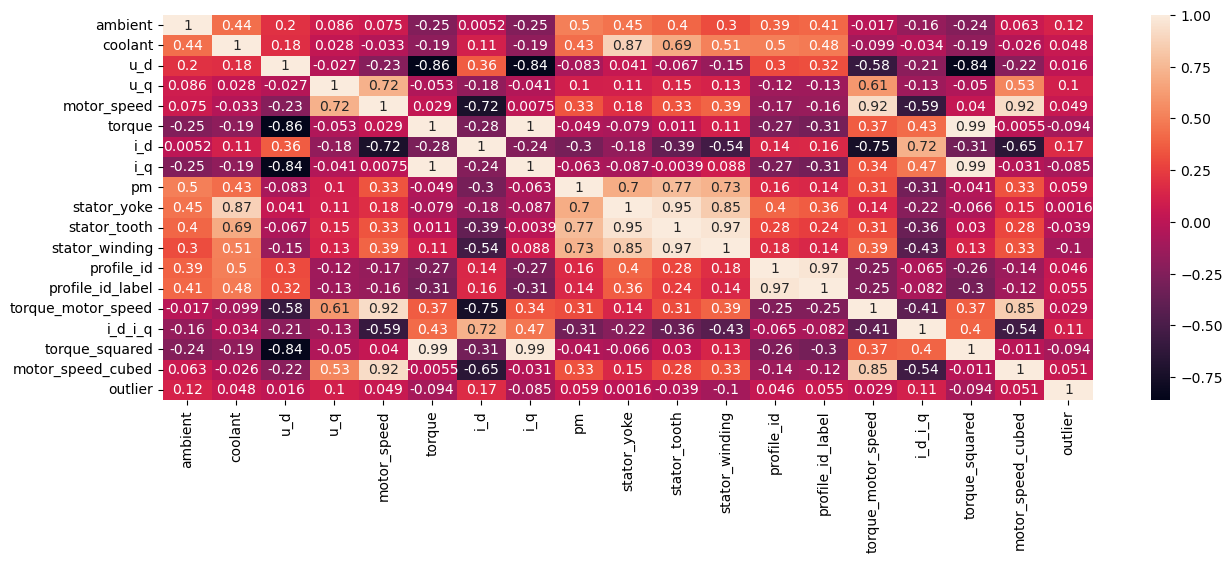

In [73]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

# Feature Engineering:

In [74]:
# Create interaction features
df['torque_motor_speed'] = df['torque'] * df['motor_speed']
df['i_d_i_q'] = df['i_d'] * df['i_q']

In [75]:
# Add polynomial features
df['torque_squared'] = df['torque'] ** 2
df['motor_speed_cubed'] = df['motor_speed'] ** 3

In [76]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id', 'profile_id_label', 'torque_motor_speed', 'i_d_i_q',
       'torque_squared', 'motor_speed_cubed', 'outlier'],
      dtype='object')


## Check skewness

In [77]:
for col in numerical_columns:
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness}")

Skewness of ambient: -0.7194198316579278
Skewness of coolant: 0.6282471402211837
Skewness of u_d: 0.1836858749157917
Skewness of u_q: 0.19988508399235624
Skewness of motor_speed: 0.33330484726455345
Skewness of torque: 0.15681284983101387
Skewness of i_d: -0.6225779727563558
Skewness of i_q: 0.15387935839014677
Skewness of pm: -0.236856024520572
Skewness of stator_yoke: 0.2572973686790822
Skewness of stator_tooth: -0.06153324108966469
Skewness of stator_winding: -0.028055113186615823
Skewness of profile_id: -0.6284123886037318
Skewness of profile_id_label: -0.022871728575080828
Skewness of torque_motor_speed: 0.6252458552456466
Skewness of i_d_i_q: 0.08186016521055266
Skewness of torque_squared: 1.2834463772059834
Skewness of motor_speed_cubed: 1.5269211891512435
Skewness of outlier: -9.8512676458001


# Feature Selection

In [78]:
from sklearn.ensemble import IsolationForest

In [79]:
numfeats = df.select_dtypes(include=['int64', 'float64']).columns

In [80]:
numfeats

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id', 'profile_id_label', 'torque_motor_speed', 'i_d_i_q',
       'torque_squared', 'motor_speed_cubed'],
      dtype='object')

In [81]:
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = isolation_forest.fit_predict(df[numfeats])

In [82]:
df['outlier'] = outliers
print(df[['outlier']].value_counts())

outlier
 1         988089
-1           9981
Name: count, dtype: int64


In [83]:
data_no_outliers = df[df['outlier'] == 1]
data_no_outliers

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id,profile_id_label,torque_motor_speed,i_d_i_q,torque_squared,motor_speed_cubed,outlier
0,0.345305,0.076232,0.523143,0.154203,0.043909,0.380139,0.992717,0.378770,0.020576,0.000762,0.000000,0.000415,0.000000,0,0.016691,0.376012,0.144506,0.000085,1
1,0.341588,0.076582,0.523599,0.154250,0.043909,0.380461,0.992703,0.378779,0.020511,0.000868,0.000292,0.000501,0.000000,0,0.016706,0.376015,0.144751,0.000085,1
2,0.339328,0.076665,0.524419,0.153118,0.043909,0.380370,0.992688,0.378784,0.020463,0.001001,0.000471,0.000563,0.000000,0,0.016702,0.376015,0.144681,0.000085,1
3,0.339708,0.076644,0.524664,0.153110,0.043908,0.380614,0.993477,0.378408,0.020657,0.001017,0.000684,0.000501,0.000000,0,0.016712,0.375940,0.144867,0.000085,1
4,0.341048,0.076642,0.525061,0.152764,0.043909,0.380594,0.993236,0.378522,0.020608,0.000978,0.000762,0.000391,0.000000,0,0.016711,0.375962,0.144852,0.000085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,0.482283,0.434238,0.524077,0.168360,0.043909,0.378463,0.992617,0.378816,0.573145,0.666050,0.660676,0.538047,0.883117,42,0.016618,0.376019,0.143234,0.000085,1
998066,0.482022,0.428938,0.524137,0.167118,0.043906,0.378463,0.992619,0.378811,0.573126,0.664847,0.660302,0.537951,0.883117,42,0.016617,0.376015,0.143234,0.000085,1
998067,0.483283,0.425846,0.523937,0.168158,0.043908,0.378463,0.992629,0.378823,0.573067,0.662394,0.660187,0.537606,0.883117,42,0.016618,0.376030,0.143234,0.000085,1
998068,0.483850,0.424539,0.523948,0.167432,0.043908,0.378463,0.992619,0.378814,0.573090,0.661519,0.659406,0.537160,0.883117,42,0.016617,0.376018,0.143234,0.000085,1


In [84]:
outliers_only = df[df['outlier'] == -1]
outliers_only

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id,profile_id_label,torque_motor_speed,i_d_i_q,torque_squared,motor_speed_cubed,outlier
59,0.357488,0.081338,0.495359,0.987072,0.765589,0.356908,0.681008,0.378039,0.022724,0.002530,0.005370,0.005868,0.0,0,0.273245,0.257447,0.127384,0.448732,-1
60,0.361659,0.081358,0.492763,0.985184,0.789585,0.351822,0.664027,0.377731,0.023317,0.002724,0.005840,0.006117,0.0,0,0.277793,0.250824,0.123779,0.492262,-1
61,0.365661,0.081363,0.491036,0.982891,0.825972,0.352545,0.642158,0.377361,0.024484,0.002908,0.006539,0.006234,0.0,0,0.291192,0.242326,0.124288,0.563503,-1
62,0.368226,0.081404,0.486573,0.979825,0.861253,0.374456,0.621857,0.377083,0.028035,0.003041,0.007329,0.006422,0.0,0,0.322501,0.234492,0.140217,0.638841,-1
63,0.369799,0.081399,0.486331,0.976002,0.900591,0.351010,0.601057,0.376566,0.032192,0.003105,0.008013,0.006756,0.0,0,0.316116,0.226338,0.123208,0.730436,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965390,0.332619,0.272798,0.925856,0.665354,0.893520,0.132638,0.452538,0.140671,0.124100,0.160766,0.183739,0.176897,1.0,51,0.118515,0.063659,0.017593,0.713368,-1
965391,0.332021,0.272970,0.907695,0.697680,0.889782,0.144671,0.470854,0.151458,0.123956,0.161084,0.184081,0.180979,1.0,51,0.128726,0.071315,0.020930,0.704452,-1
965392,0.331494,0.273250,0.864054,0.753339,0.881298,0.172031,0.503547,0.176697,0.124437,0.161352,0.184689,0.183817,1.0,51,0.151610,0.088975,0.029595,0.684493,-1
967653,0.367711,0.601682,0.008823,0.263575,0.568284,0.857248,0.230169,0.814853,0.334374,0.458854,0.403451,0.342856,1.0,51,0.487160,0.187554,0.734874,0.183525,-1


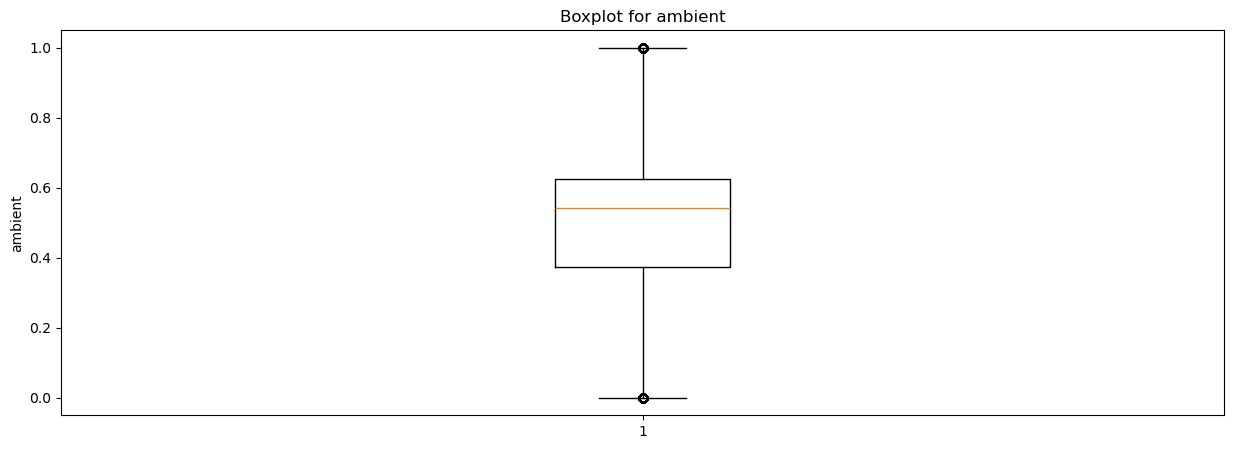

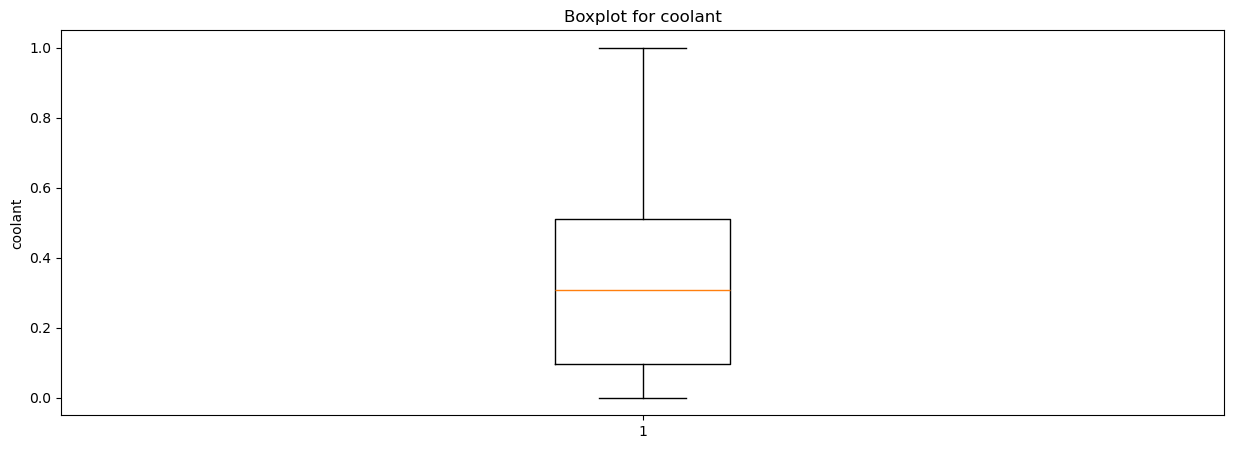

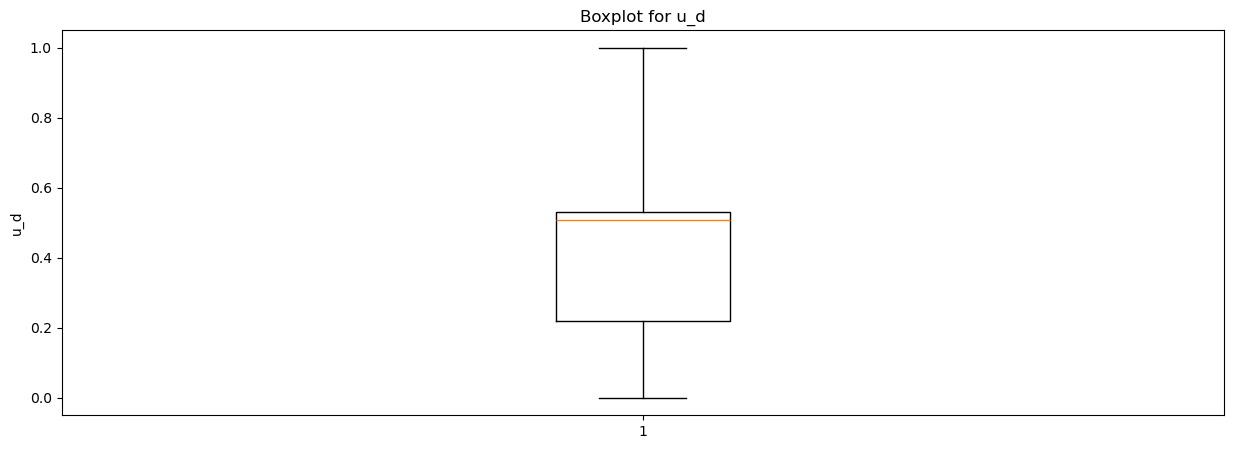

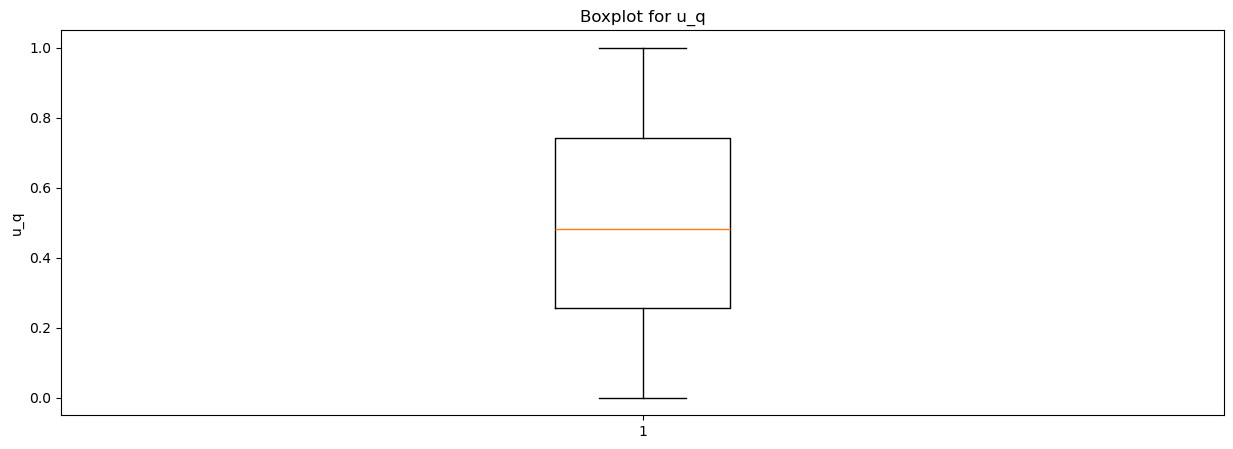

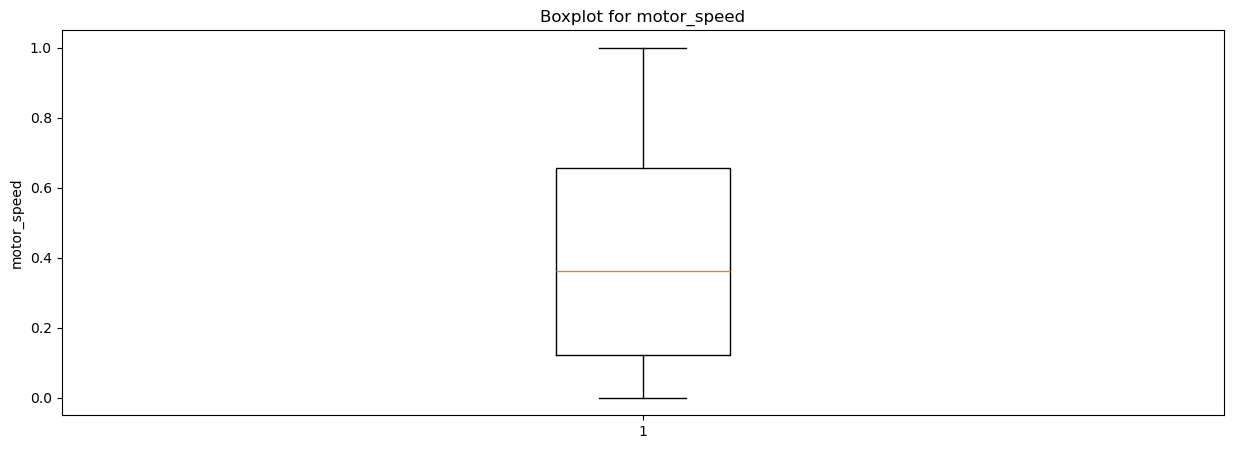

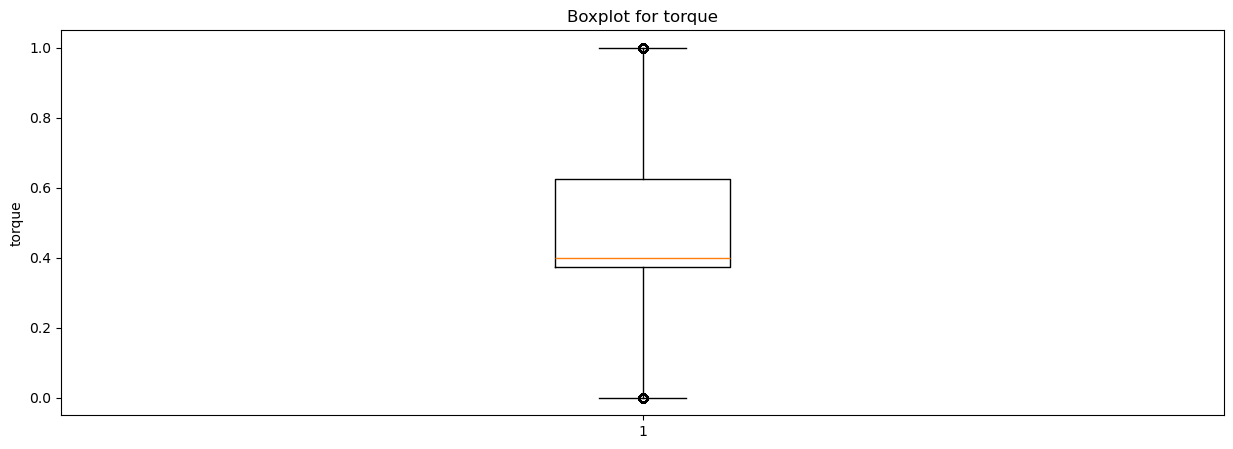

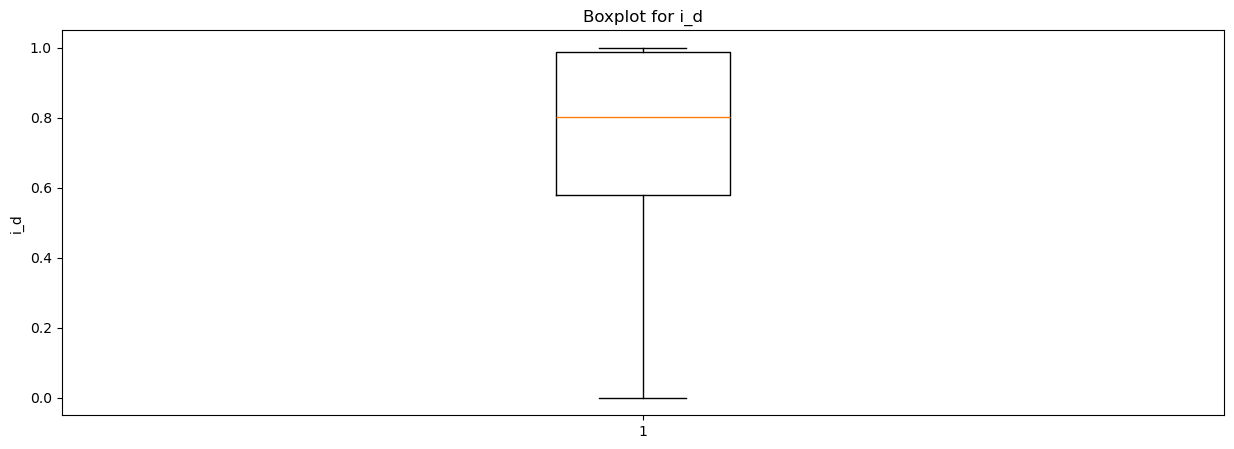

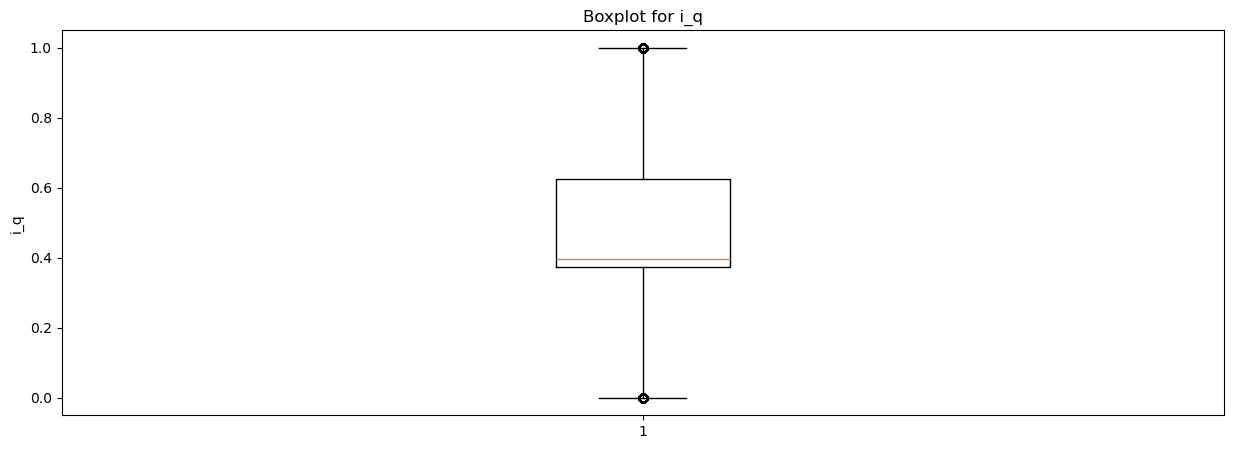

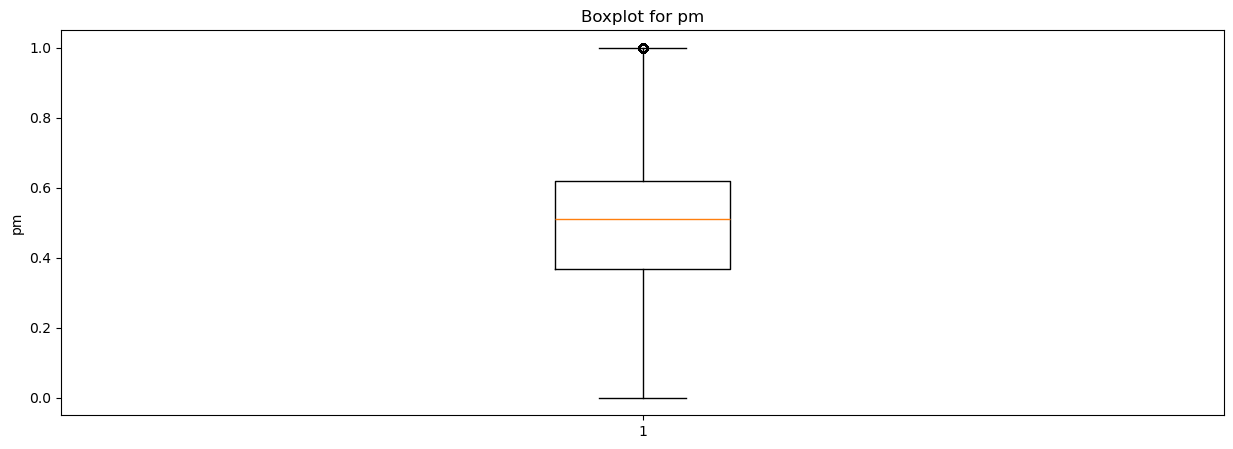

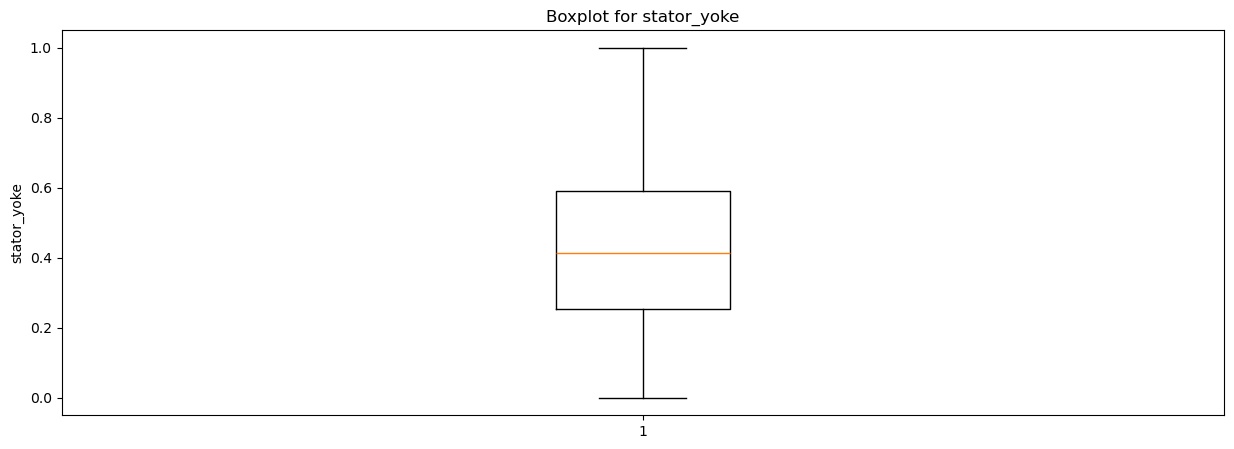

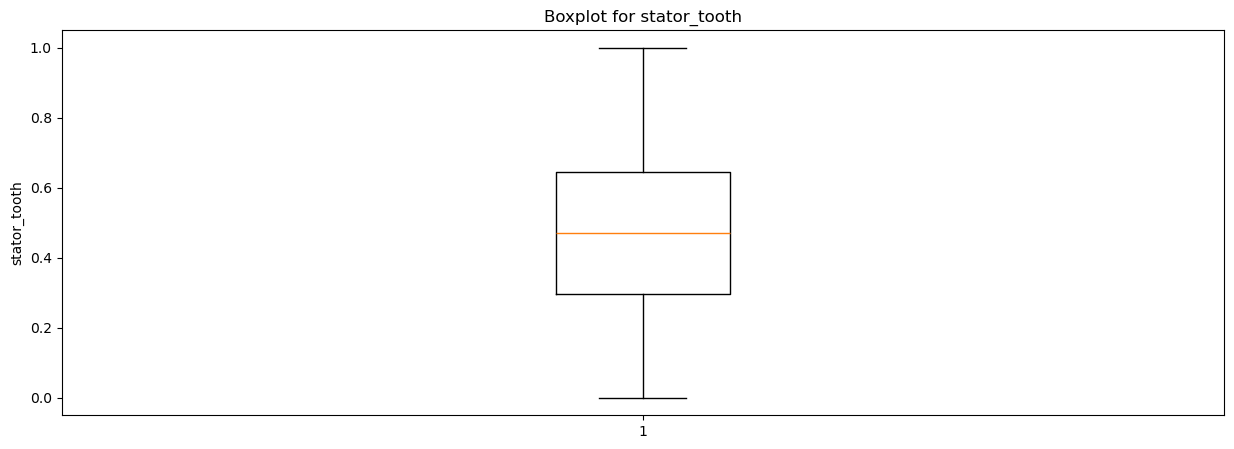

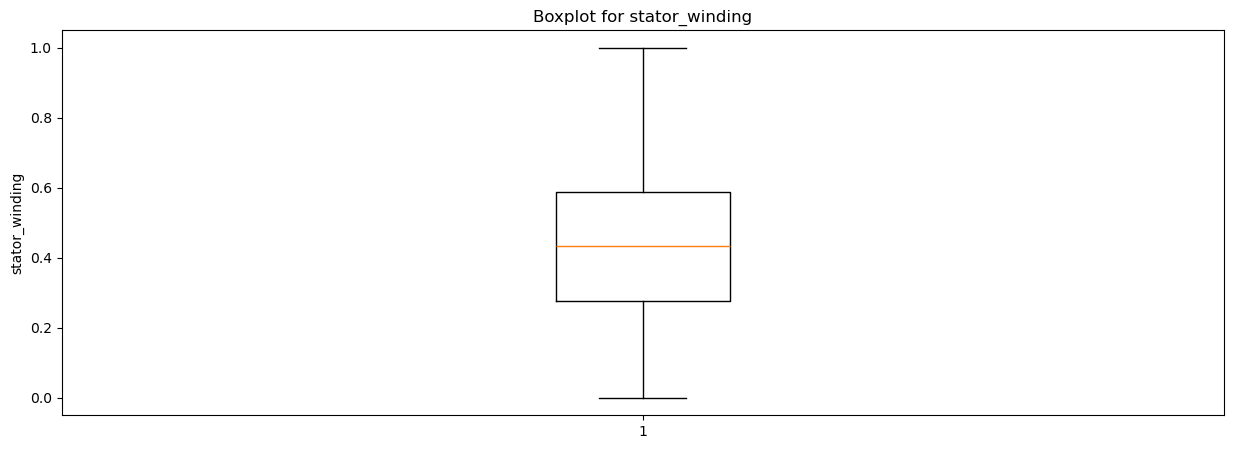

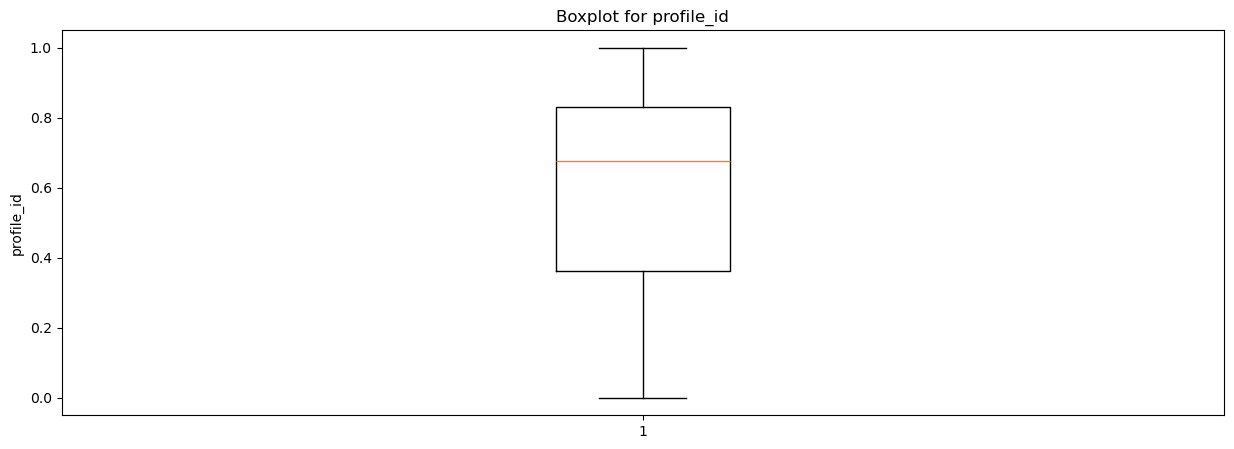

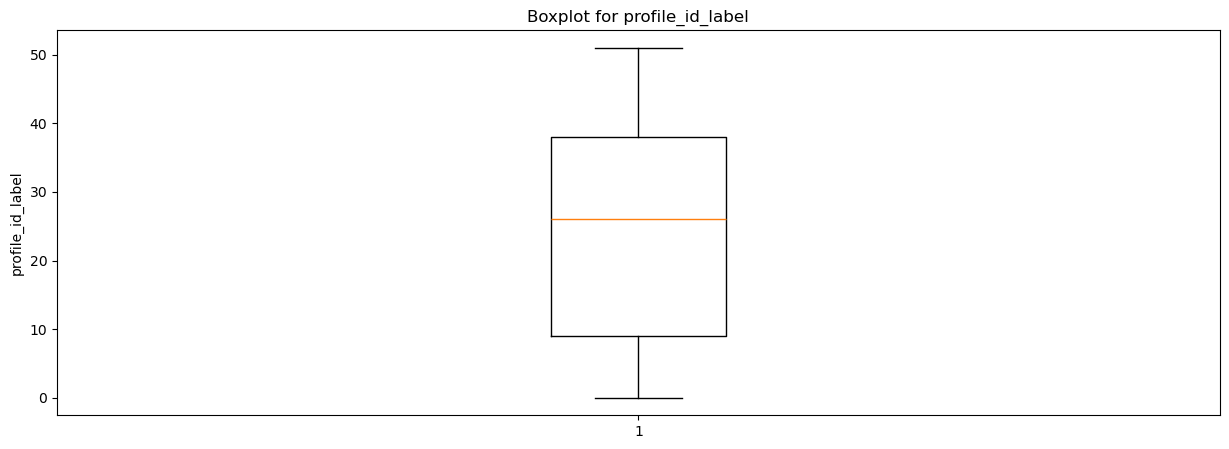

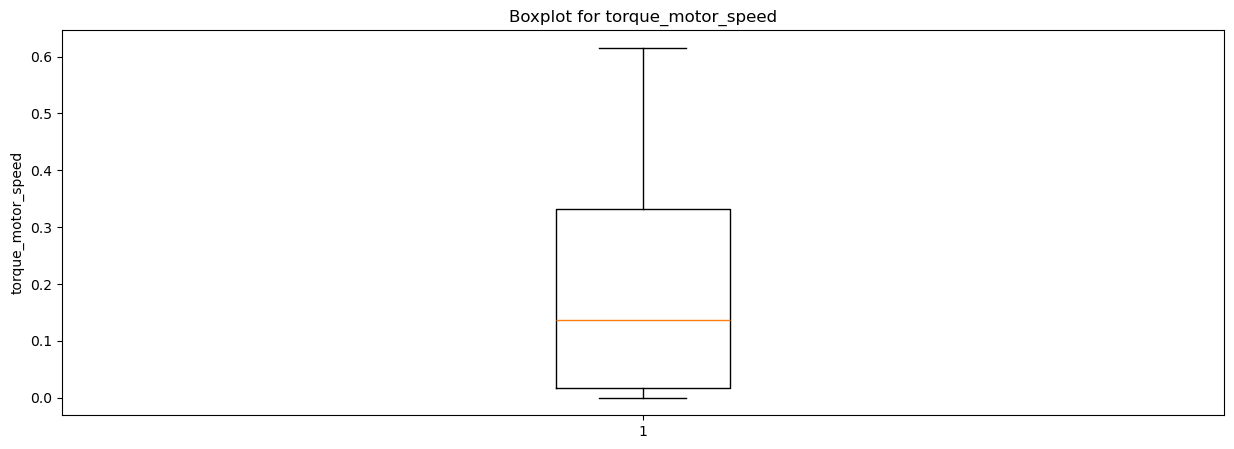

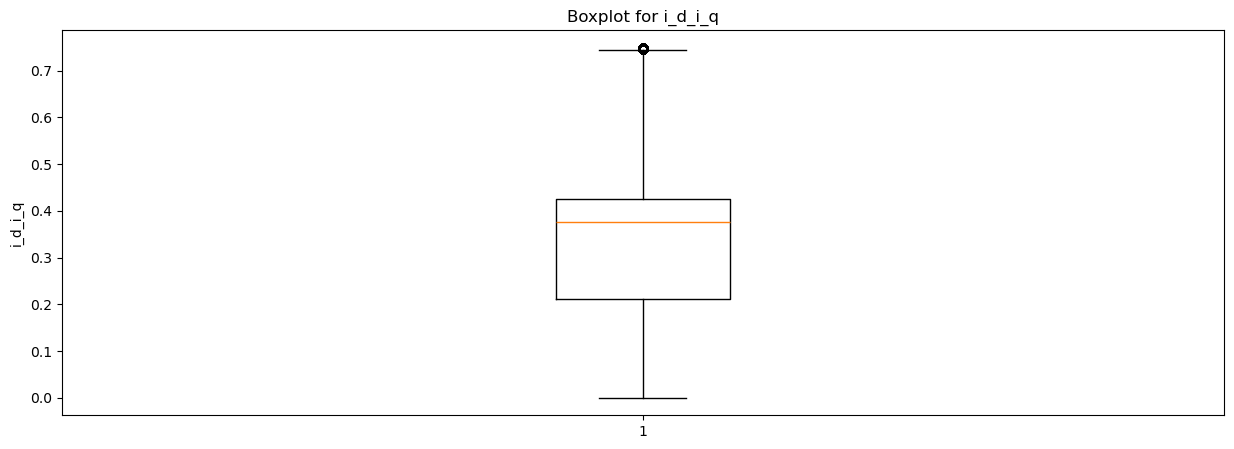

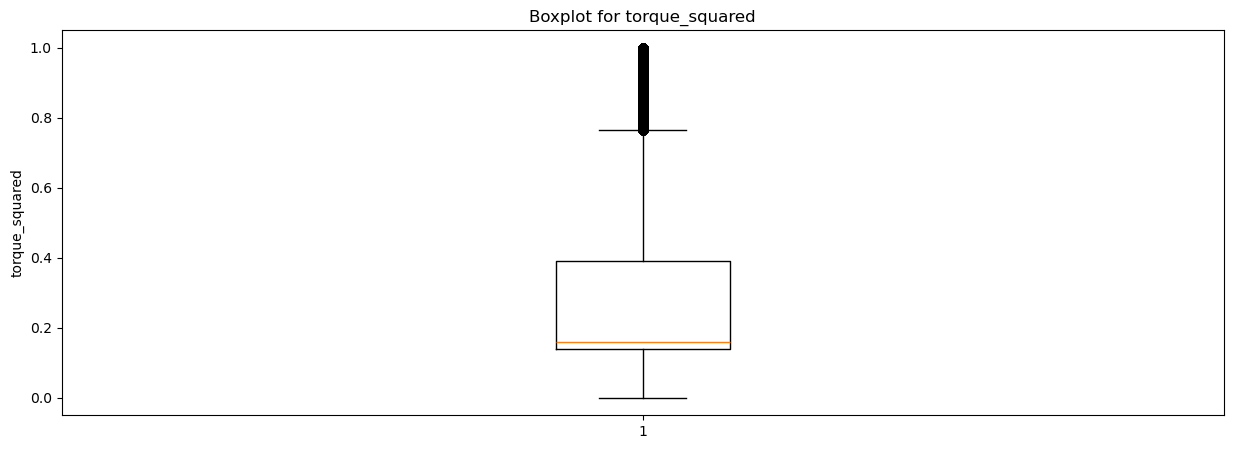

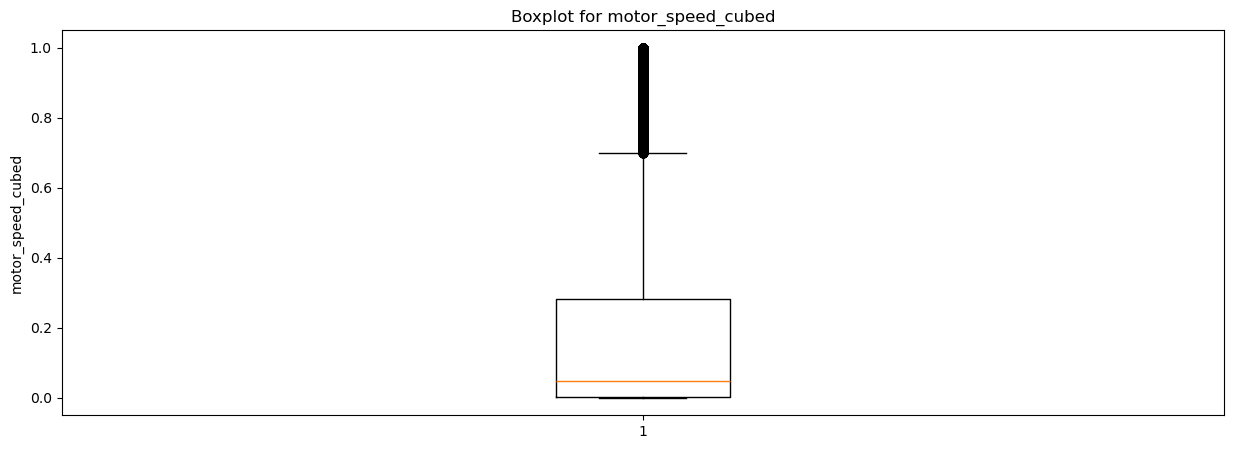

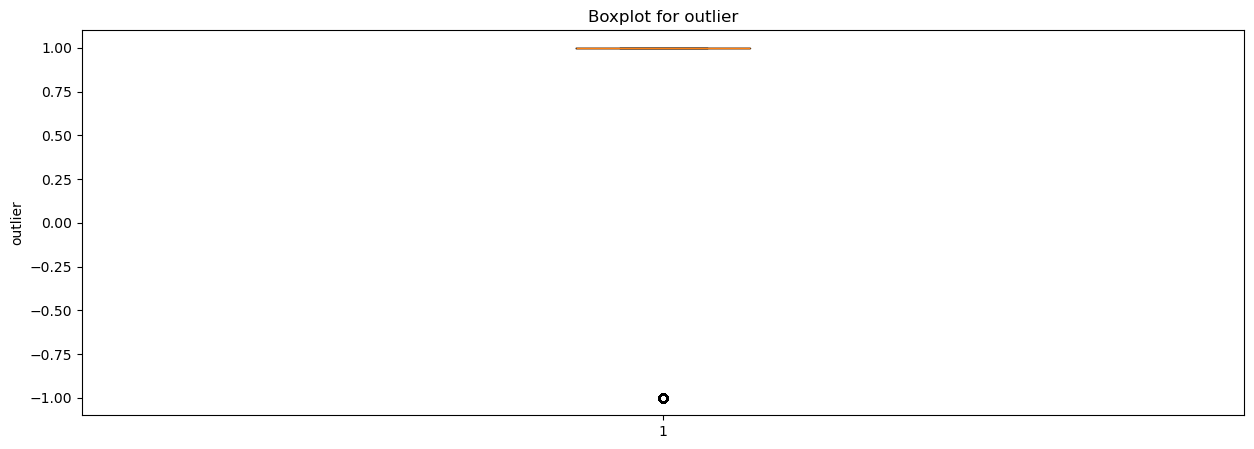

In [85]:
# checking Outlines
for column in df.columns:
    plt.figure(figsize=(15,5))  # Create a new figure for each plot
    plt.boxplot(df[column])
    plt.title(f"Boxplot for {column}")
    plt.ylabel(column)
    plt.show()

In [86]:
#outlier Detection
def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df        

In [87]:
outlier_Detection(df,['ambient','coolant','u_d','u_q','motor_speed','torque','i_d','i_q','pm','stator_yoke','stator_tooth','stator_winding','profile_id','torque_squared','motor_speed_cubed'])

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id,profile_id_label,torque_motor_speed,i_d_i_q,torque_squared,motor_speed_cubed,outlier
0,0.345305,0.076232,0.523143,0.154203,0.043909,0.380139,0.992717,0.378770,0.020576,0.000762,0.000000,0.000415,0.000000,0,0.016691,0.376012,0.144506,0.000085,1
1,0.341588,0.076582,0.523599,0.154250,0.043909,0.380461,0.992703,0.378779,0.020511,0.000868,0.000292,0.000501,0.000000,0,0.016706,0.376015,0.144751,0.000085,1
2,0.339328,0.076665,0.524419,0.153118,0.043909,0.380370,0.992688,0.378784,0.020463,0.001001,0.000471,0.000563,0.000000,0,0.016702,0.376015,0.144681,0.000085,1
3,0.339708,0.076644,0.524664,0.153110,0.043908,0.380614,0.993477,0.378408,0.020657,0.001017,0.000684,0.000501,0.000000,0,0.016712,0.375940,0.144867,0.000085,1
4,0.341048,0.076642,0.525061,0.152764,0.043909,0.380594,0.993236,0.378522,0.020608,0.000978,0.000762,0.000391,0.000000,0,0.016711,0.375962,0.144852,0.000085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,0.482283,0.434238,0.524077,0.168360,0.043909,0.378463,0.992617,0.378816,0.573145,0.666050,0.660676,0.538047,0.883117,42,0.016618,0.376019,0.143234,0.000085,1
998066,0.482022,0.428938,0.524137,0.167118,0.043906,0.378463,0.992619,0.378811,0.573126,0.664847,0.660302,0.537951,0.883117,42,0.016617,0.376015,0.143234,0.000085,1
998067,0.483283,0.425846,0.523937,0.168158,0.043908,0.378463,0.992629,0.378823,0.573067,0.662394,0.660187,0.537606,0.883117,42,0.016618,0.376030,0.143234,0.000085,1
998068,0.483850,0.424539,0.523948,0.167432,0.043908,0.378463,0.992619,0.378814,0.573090,0.661519,0.659406,0.537160,0.883117,42,0.016617,0.376018,0.143234,0.000085,1


In [88]:
df

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id,profile_id_label,torque_motor_speed,i_d_i_q,torque_squared,motor_speed_cubed,outlier
0,0.345305,0.076232,0.523143,0.154203,0.043909,0.380139,0.992717,0.378770,0.020576,0.000762,0.000000,0.000415,0.000000,0,0.016691,0.376012,0.144506,0.000085,1
1,0.341588,0.076582,0.523599,0.154250,0.043909,0.380461,0.992703,0.378779,0.020511,0.000868,0.000292,0.000501,0.000000,0,0.016706,0.376015,0.144751,0.000085,1
2,0.339328,0.076665,0.524419,0.153118,0.043909,0.380370,0.992688,0.378784,0.020463,0.001001,0.000471,0.000563,0.000000,0,0.016702,0.376015,0.144681,0.000085,1
3,0.339708,0.076644,0.524664,0.153110,0.043908,0.380614,0.993477,0.378408,0.020657,0.001017,0.000684,0.000501,0.000000,0,0.016712,0.375940,0.144867,0.000085,1
4,0.341048,0.076642,0.525061,0.152764,0.043909,0.380594,0.993236,0.378522,0.020608,0.000978,0.000762,0.000391,0.000000,0,0.016711,0.375962,0.144852,0.000085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,0.482283,0.434238,0.524077,0.168360,0.043909,0.378463,0.992617,0.378816,0.573145,0.666050,0.660676,0.538047,0.883117,42,0.016618,0.376019,0.143234,0.000085,1
998066,0.482022,0.428938,0.524137,0.167118,0.043906,0.378463,0.992619,0.378811,0.573126,0.664847,0.660302,0.537951,0.883117,42,0.016617,0.376015,0.143234,0.000085,1
998067,0.483283,0.425846,0.523937,0.168158,0.043908,0.378463,0.992629,0.378823,0.573067,0.662394,0.660187,0.537606,0.883117,42,0.016618,0.376030,0.143234,0.000085,1
998068,0.483850,0.424539,0.523948,0.167432,0.043908,0.378463,0.992619,0.378814,0.573090,0.661519,0.659406,0.537160,0.883117,42,0.016617,0.376018,0.143234,0.000085,1


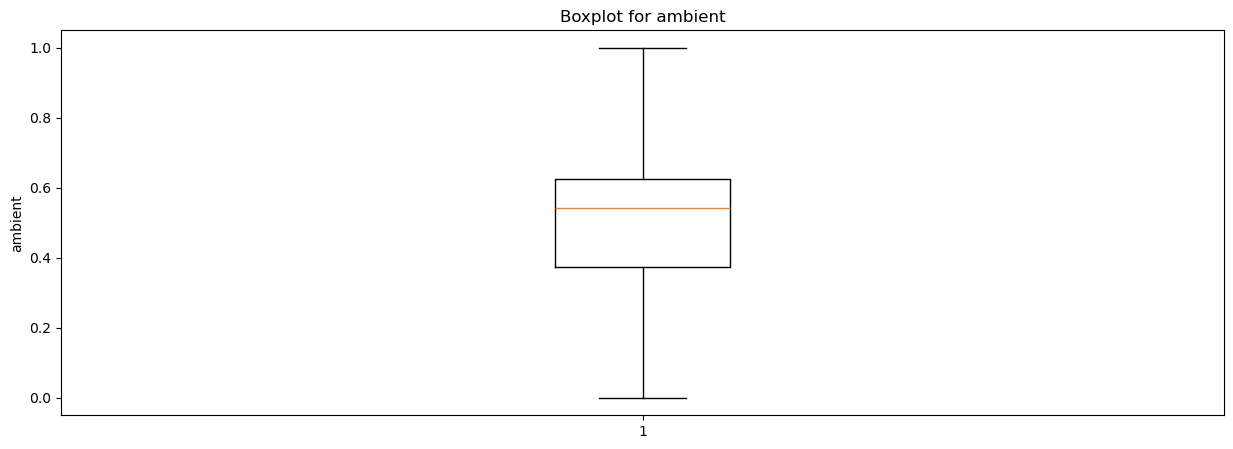

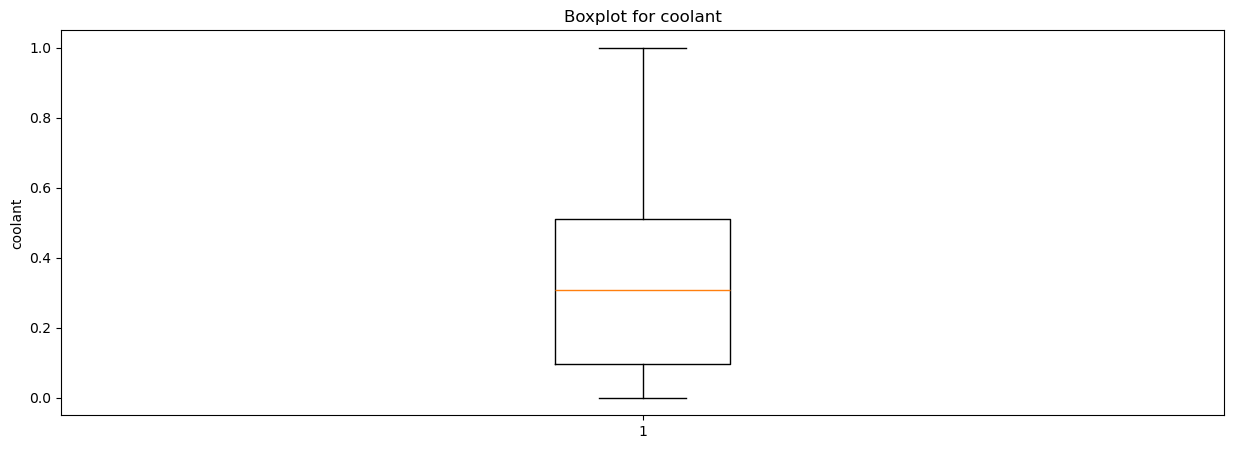

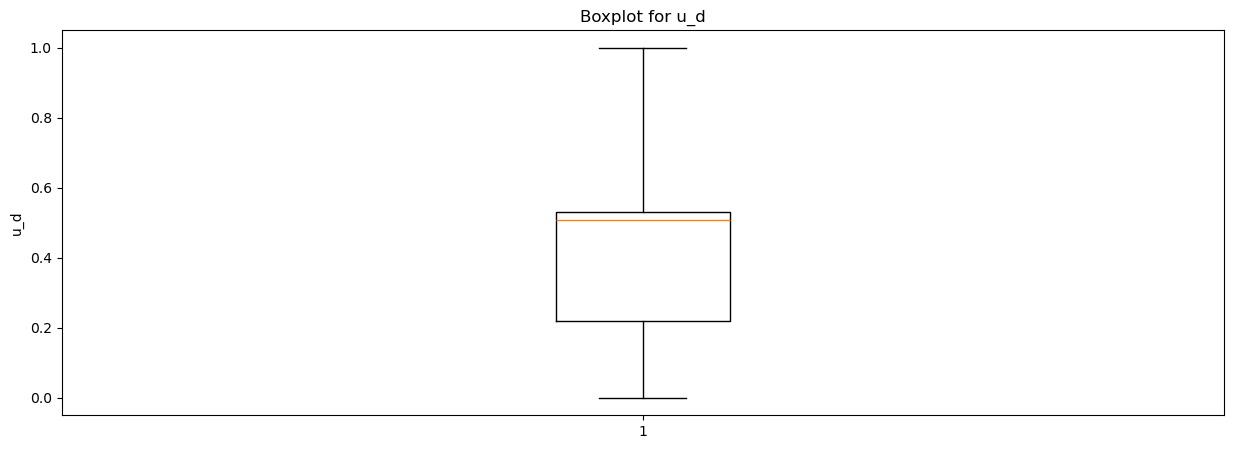

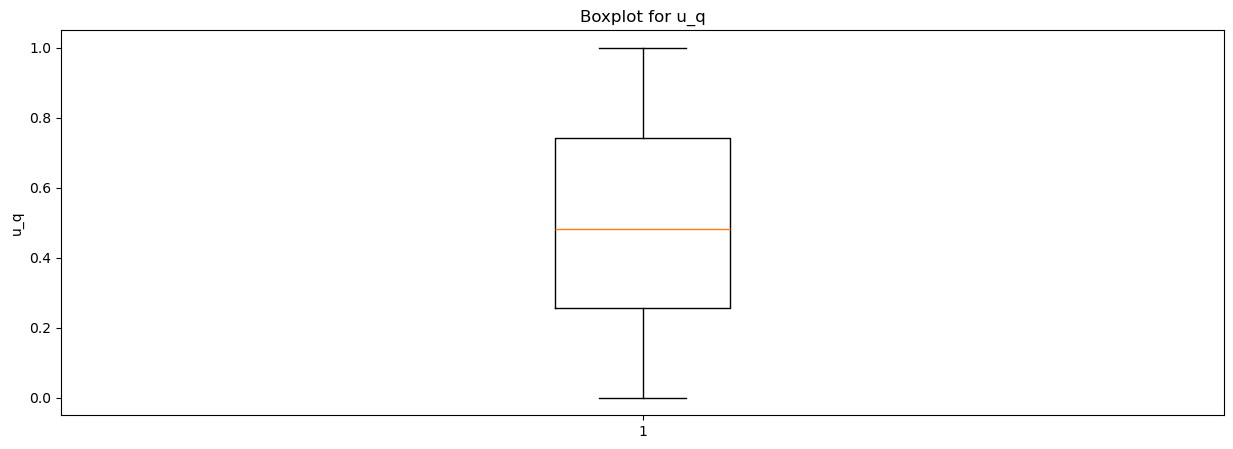

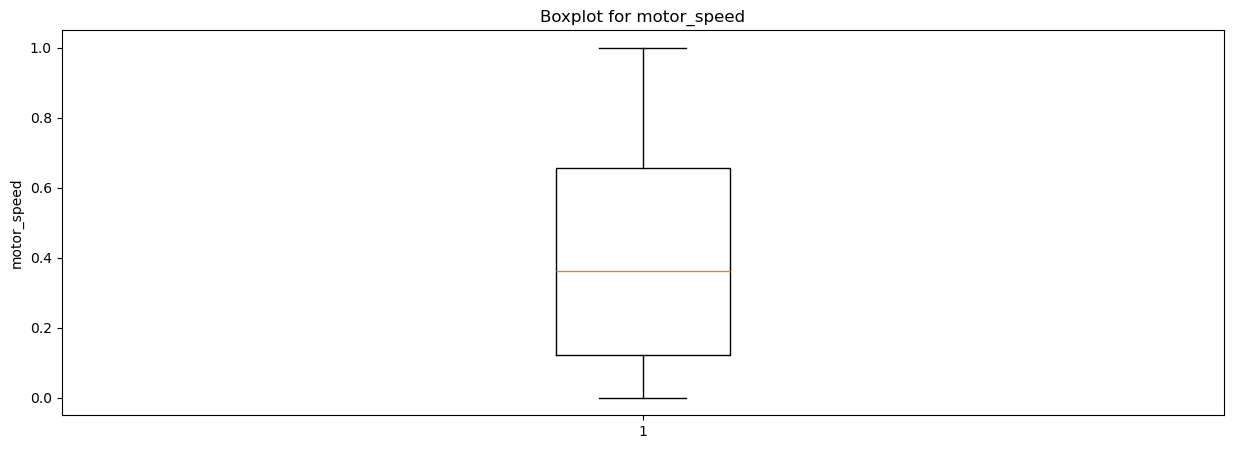

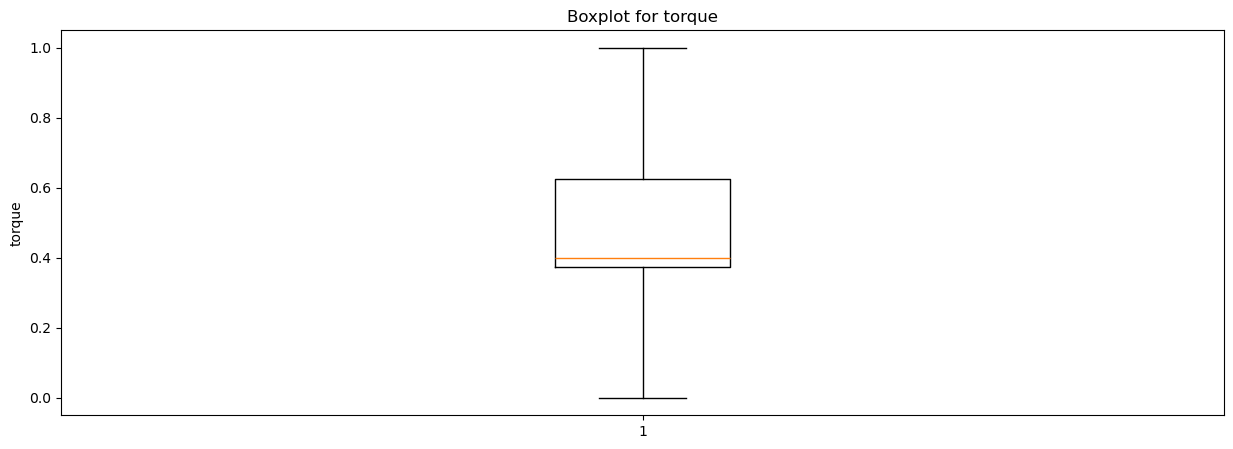

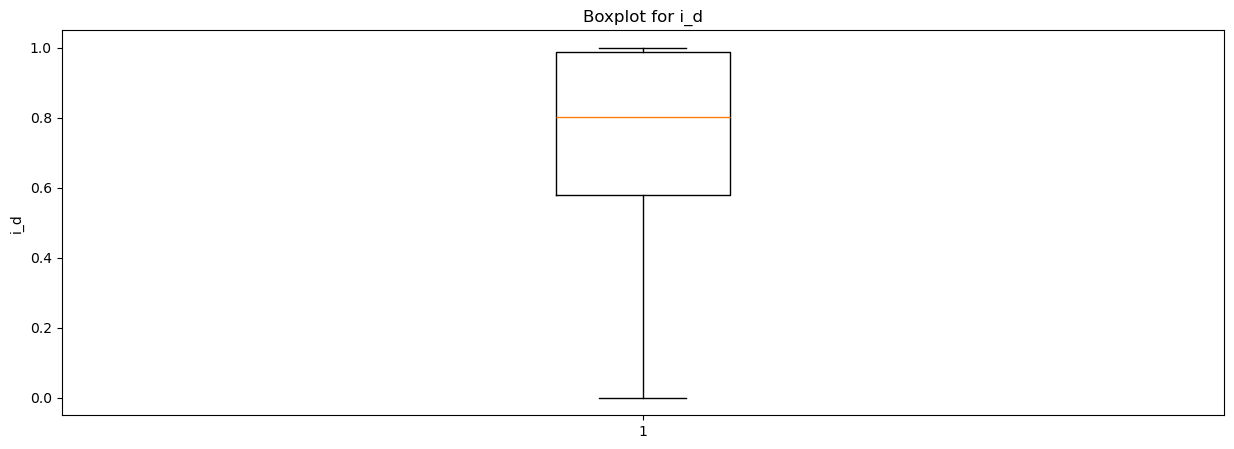

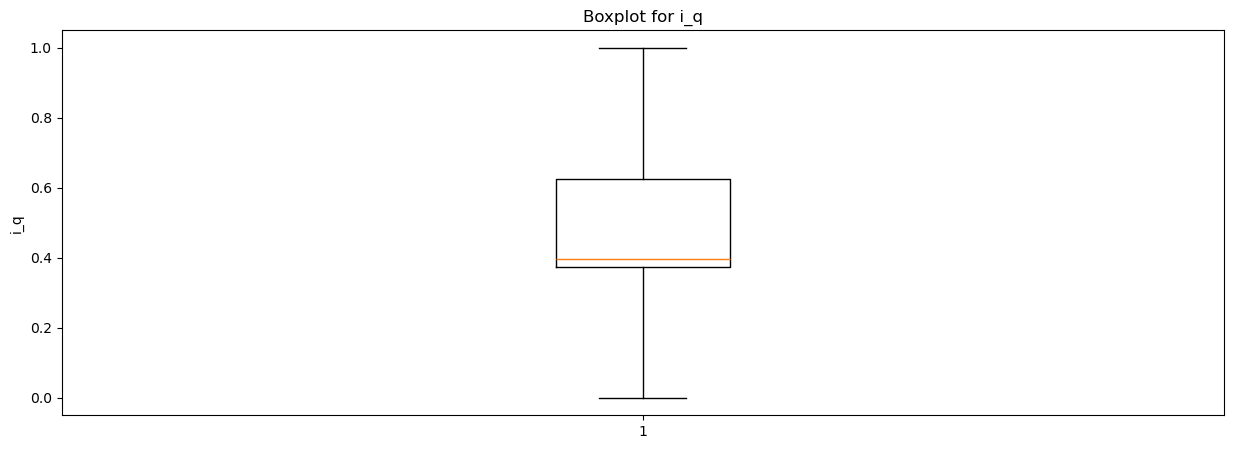

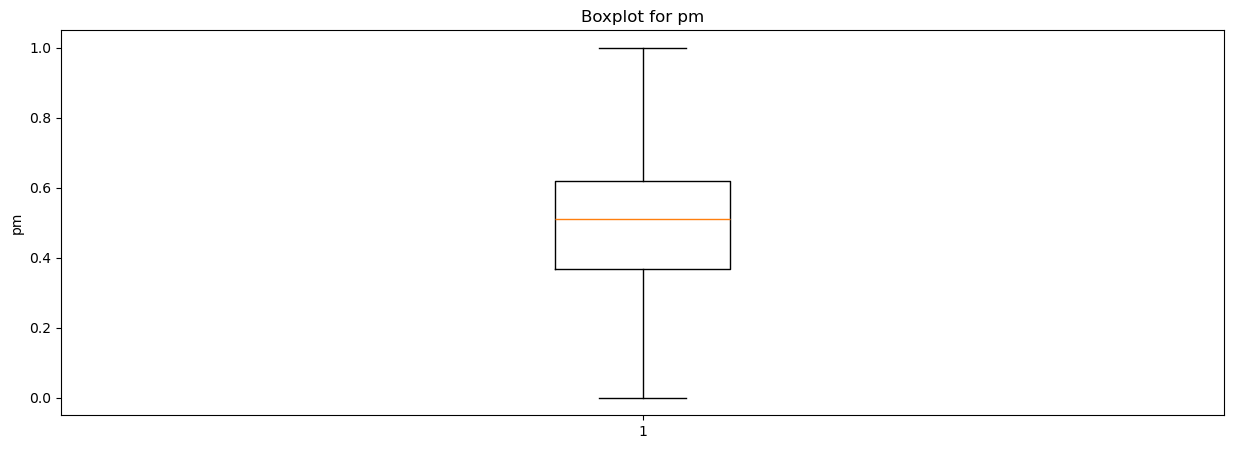

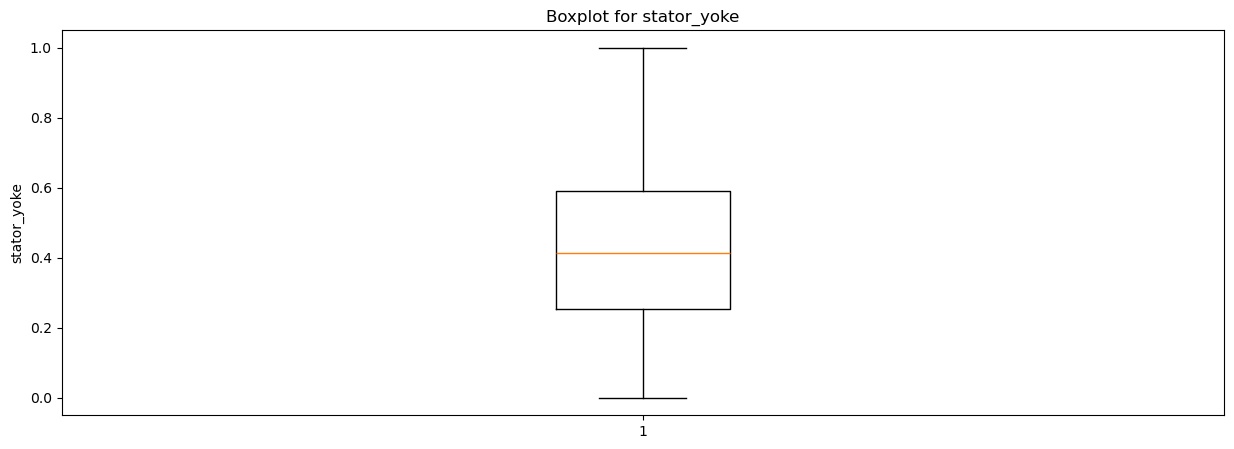

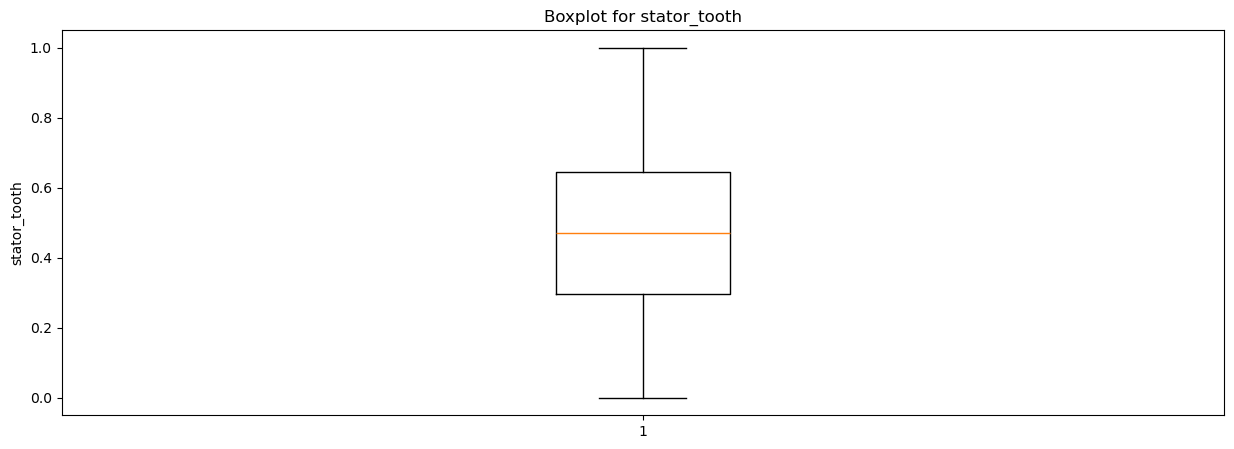

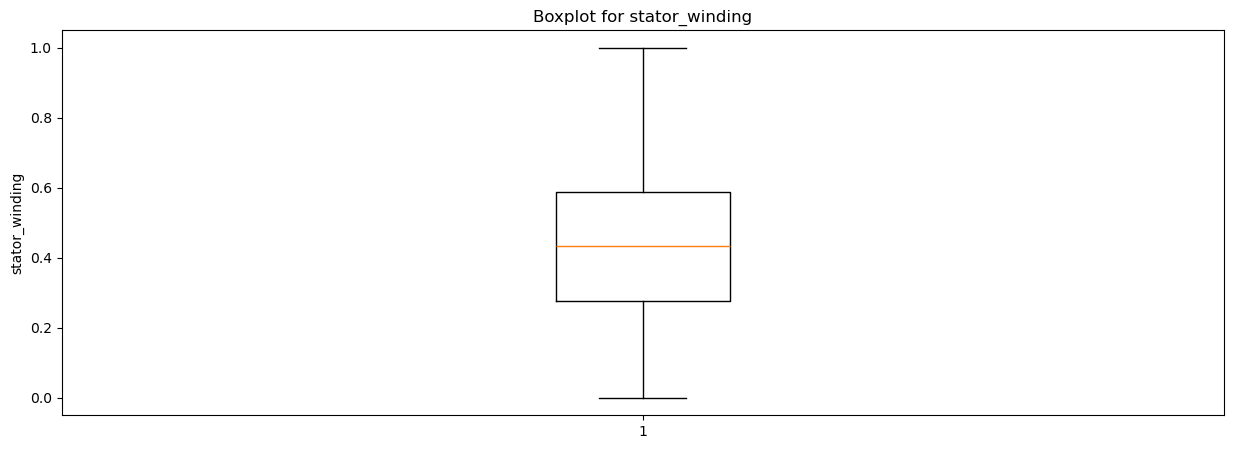

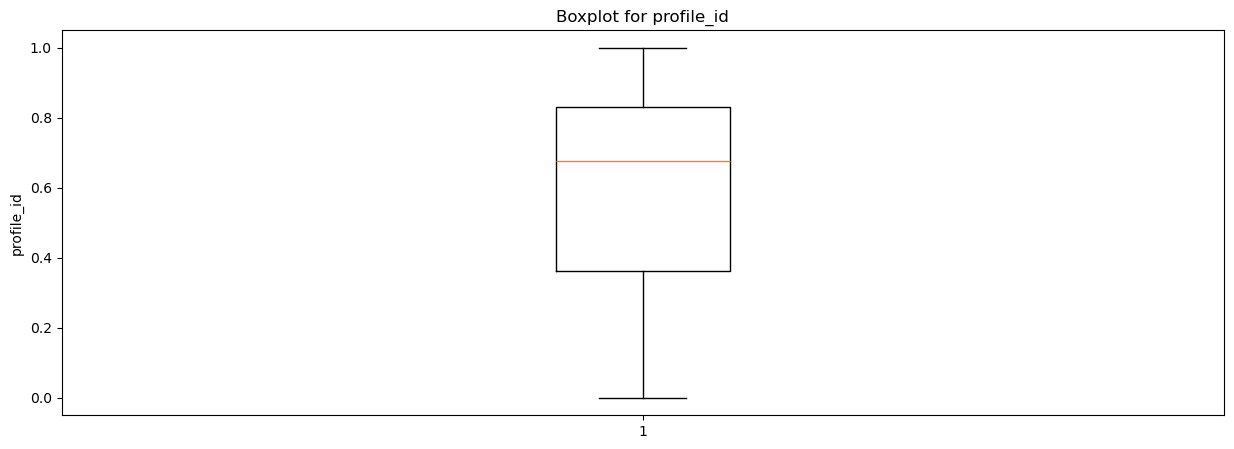

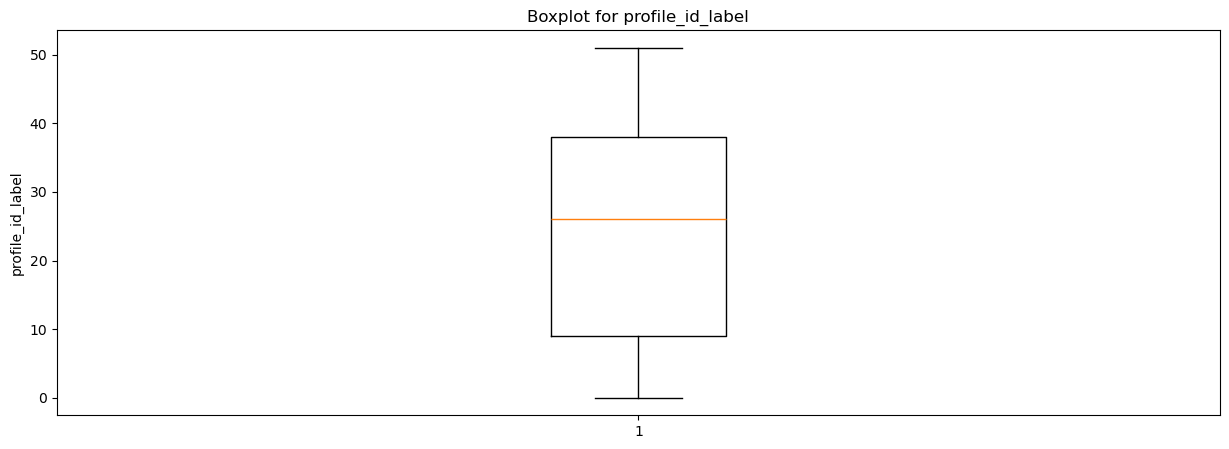

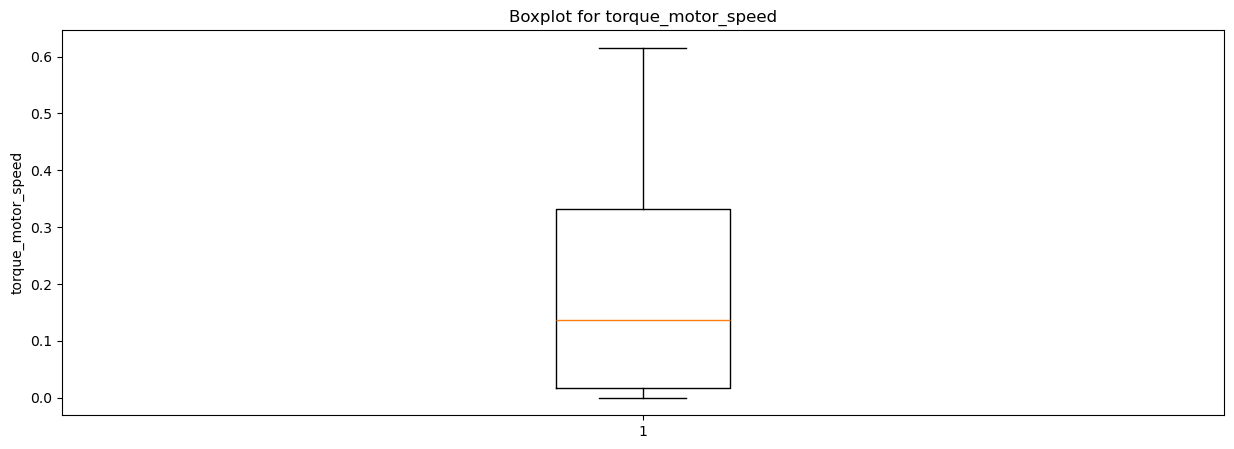

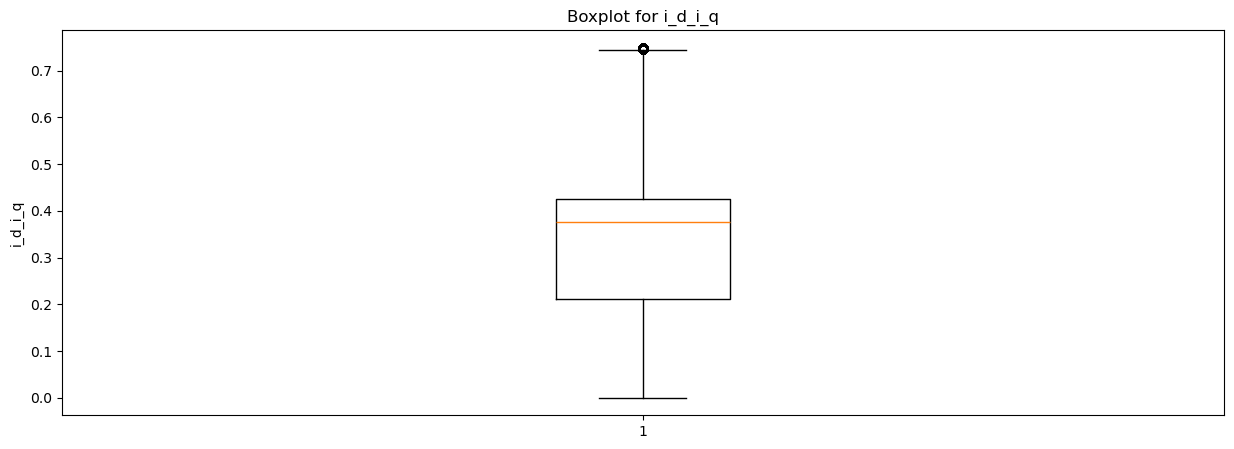

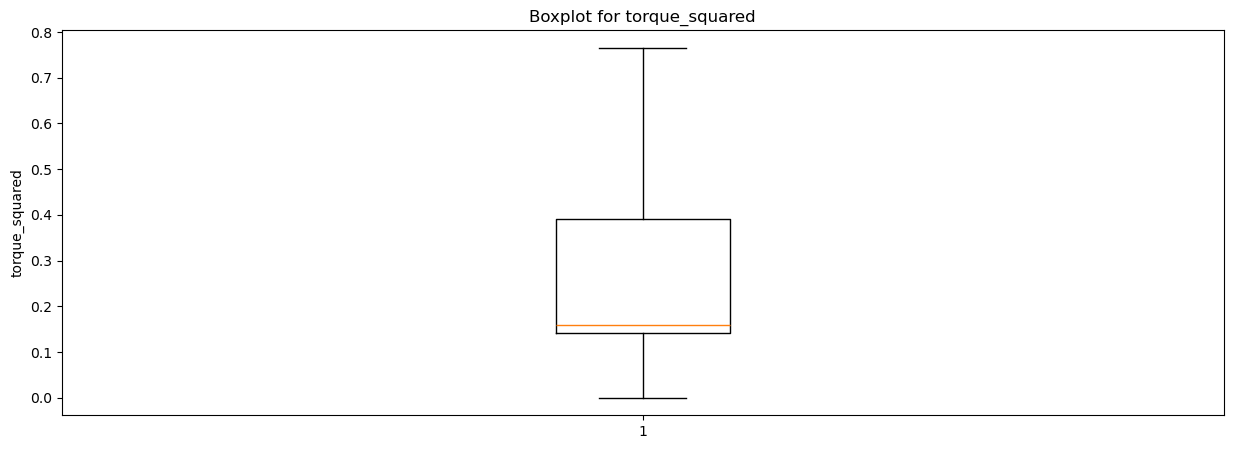

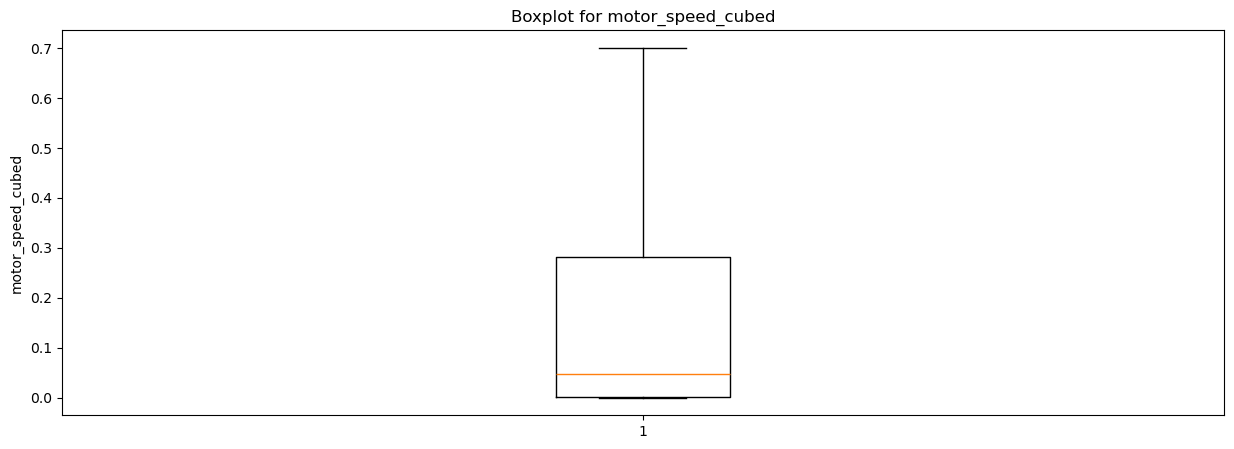

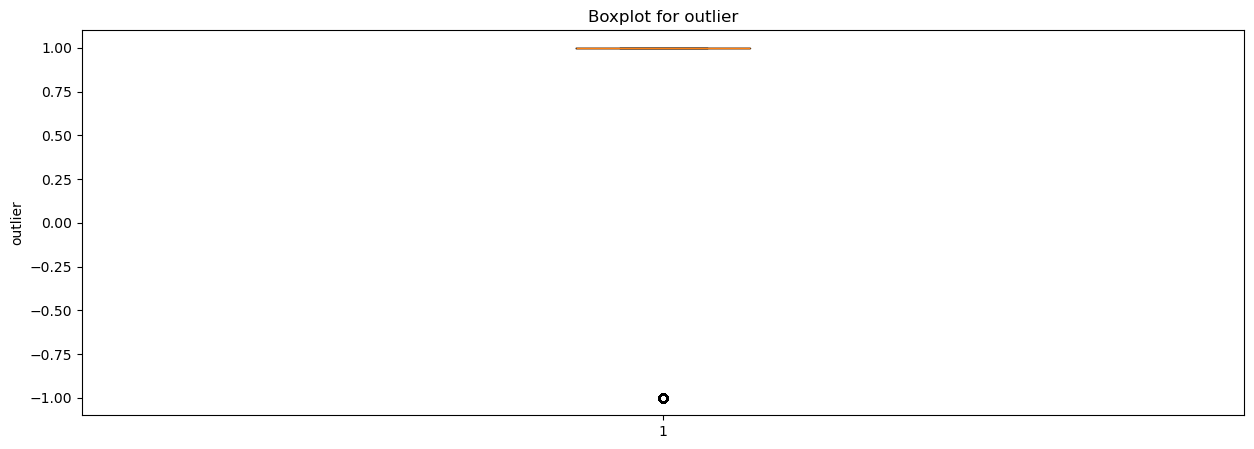

In [89]:
# After Outlier Detection
for column in df.columns:
    plt.figure(figsize=(15,5))  # Create a new figure for each plot
    plt.boxplot(df[column])
    plt.title(f"Boxplot for {column}")
    plt.ylabel(column)
    plt.show()